# 1. Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML
import matplotlib.style as style 
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import metrics
import utils
import networkx as nx

In [191]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...,Airflow,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...
1,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...,Hadoop,37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...
2,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,MariaDB,d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...
3,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...
4,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,MySQL,44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...


In [192]:
#Drop Nodos que no sean personas
nodos = nodos[nodos["n.type"] == "person"]

#Display HTMl
display(nodos.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


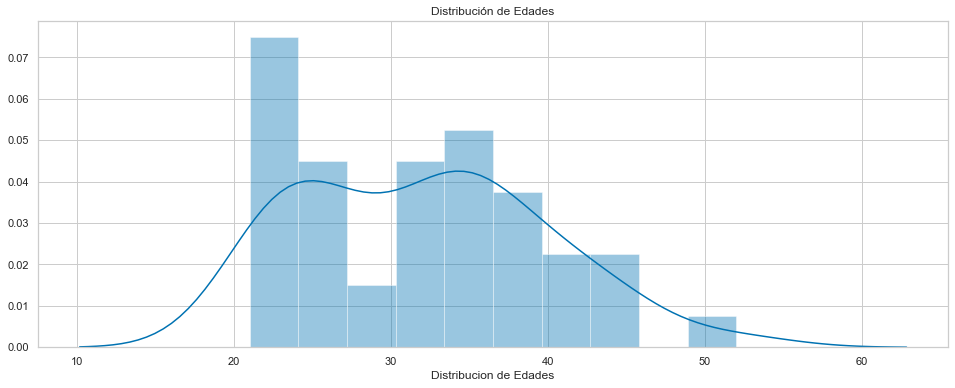

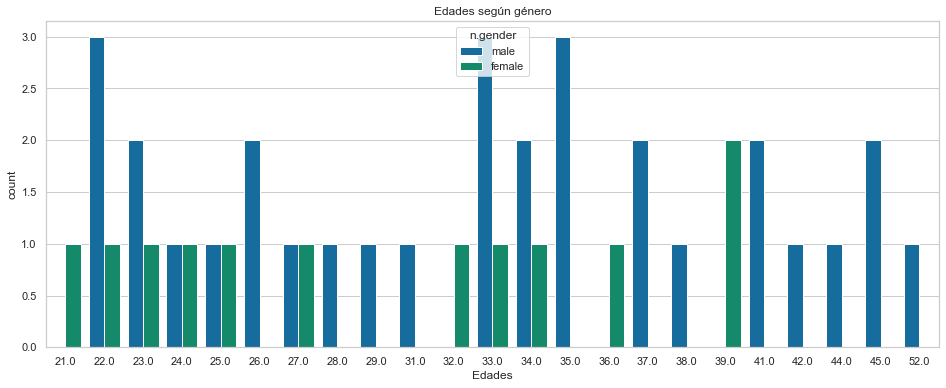

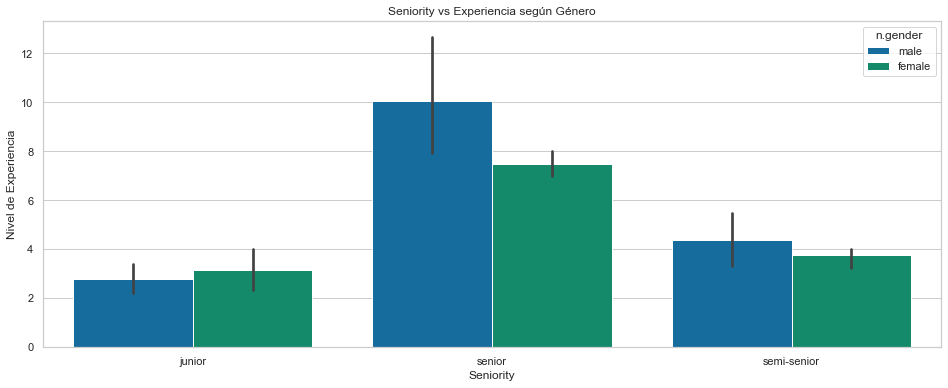

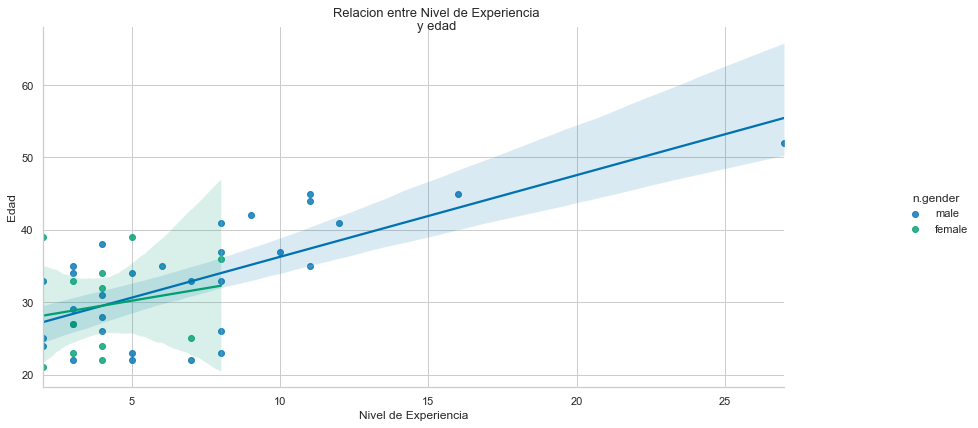

In [193]:
#Contexto
sns.set_style("whitegrid")
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Primeras Visualizaciones
#Distribucion de edades
plt.figure(figsize=(16.3, 6))
g = sns.distplot(nodos["n.age"], bins = 10, 
                 axlabel="Distribucion de Edades")
g.set_title("Distribución de Edades")
plt.show()

#Edades
plt.figure(figsize=(16, 6))
g = sns.countplot(data=nodos, x="n.age", hue="n.gender")
g.set(xlabel="Edades")
g.set_title("Edades según género")
plt.show()

#Experiencia vs Seniority
plt.figure(figsize=(16.1, 6))
g = sns.barplot(x="n.category", y="n.experience", 
                data=nodos, hue="n.gender")
g.set(xlabel='Seniority', ylabel='Nivel de Experiencia')
g.set_title("Seniority vs Experiencia según Género")
plt.show()

#Experiencia vs edad
g = sns.lmplot(x="n.experience", y="n.age",
              data=nodos, hue="n.gender")
g.fig.set_size_inches(15,6)
g.set(xlabel='Nivel de Experiencia', ylabel='Edad')
g.fig.suptitle("Relacion entre Nivel de Experiencia"  +"\n" + "y edad", fontsize=13, va="center")
plt.show()

In [194]:
#Seleccion de personas
personas = nodos[nodos["n.type"] == "person"]

#Merge en un solo df
df = personas.merge(relaciones)
display(df.head())
#display(personas)

#Genero una lista de trabajadores
print("Lista de trabajadores")
trabajadores = personas["name_node_a"].unique()
print(trabajadores)
print("\n")

#Skills
print("Skills")
tech = df["name_node_b"].unique()
print(tech)

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience,id_node_a,id_node_b,name_node_b,id_relationship
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,AWS,799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...
1,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...
2,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,43b6f263edd9539008d17939797e828c-a87ff679a2f3e...,Golden Gate,d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...
3,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...
4,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...,Oracle,fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...


Lista de trabajadores
['David H' 'Walter L' 'Dario O' 'Luis D' 'Edgardo O' 'Hernan U'
 'Cristian G' 'Diego M' 'Armando I' 'Ursula P' 'Esteban Q' 'Susana S'
 'Rircardo I' 'Luis U' 'Gabriela B' 'Hugo S' 'Martina S' 'Patricia L'
 'Mauricio H' 'Gustavo M' 'Oscar H' 'Miguel B' 'Karen H' 'Natali L'
 'Victoria B' 'Pablo A' 'Juan P' 'Mariana T' 'Luciano M' 'Marcela'
 'Daniel' 'Leonardo' 'Matias' 'Lionel' 'Miguel' 'Luciana' 'Marcelo'
 'Jonatan' 'Lucas' 'Fernando' 'Gastón' 'Andrea' 'Martin']


Skills
['AWS' 'DBA' 'Golden Gate' 'java' 'Oracle' 'SQL Server' 'Developer'
 'Linux' 'Docker' 'Vertica' 'Technical Leader' 'MariaDB' 'Data Scientist'
 'Hadoop' 'Spark' 'scala' 'PostgreSQL' 'Google cloud' 'R' 'MySQL' 'phyton'
 'windows' 'MongoDB' 'Oracle Cloud' 'unix' 'ODI' 'S3' 'EC2' 'Kubernetes'
 'talend' 'pentaho' 'neo4j' 'SQL' 'AWS Lambda' 'Redis' 'Azure']


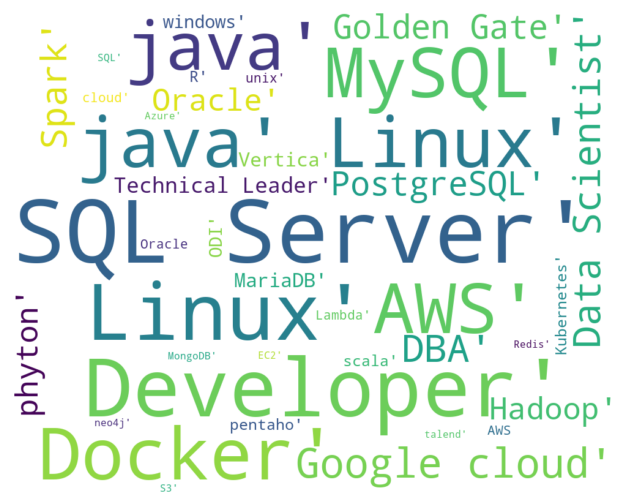

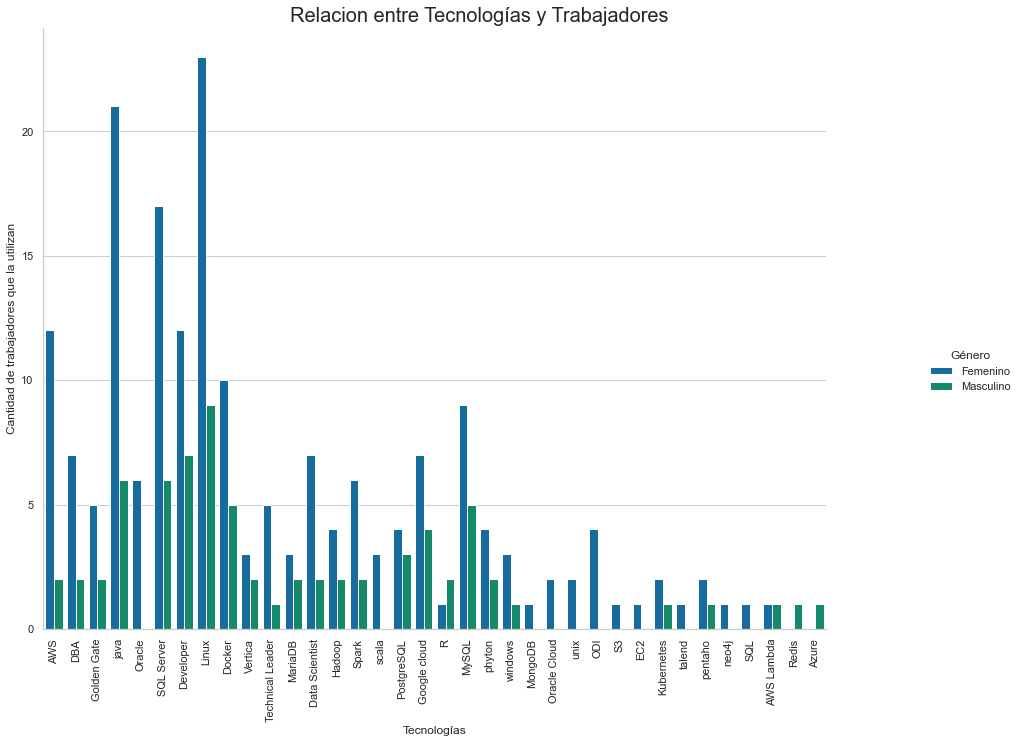

In [195]:
#Librerias
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Visualizaciones
#Skills
Skills = df['name_node_b'].values
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = wordcloud = WordCloud(width=1000, height=800, background_color="white")
wc.generate(str(Skills))
plt.figure(figsize = (16,9) )
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Gráfico y customización
g = sns.catplot(x="name_node_b", data=df, hue="n.gender", kind="count", legend_out=True)
plt.xticks(rotation=90)
g.fig.set_size_inches(15,10)
g.set(xlabel='Tecnologías', ylabel='Cantidad de trabajadores que la utilizan')
g.fig.suptitle("Relacion entre Tecnologías y Trabajadores", fontsize=20, va="center")
g._legend.set_title("Género")
new_labels = ['Femenino', 'Masculino']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#Visualización
plt.show()

<class 'networkx.classes.graph.Graph'>


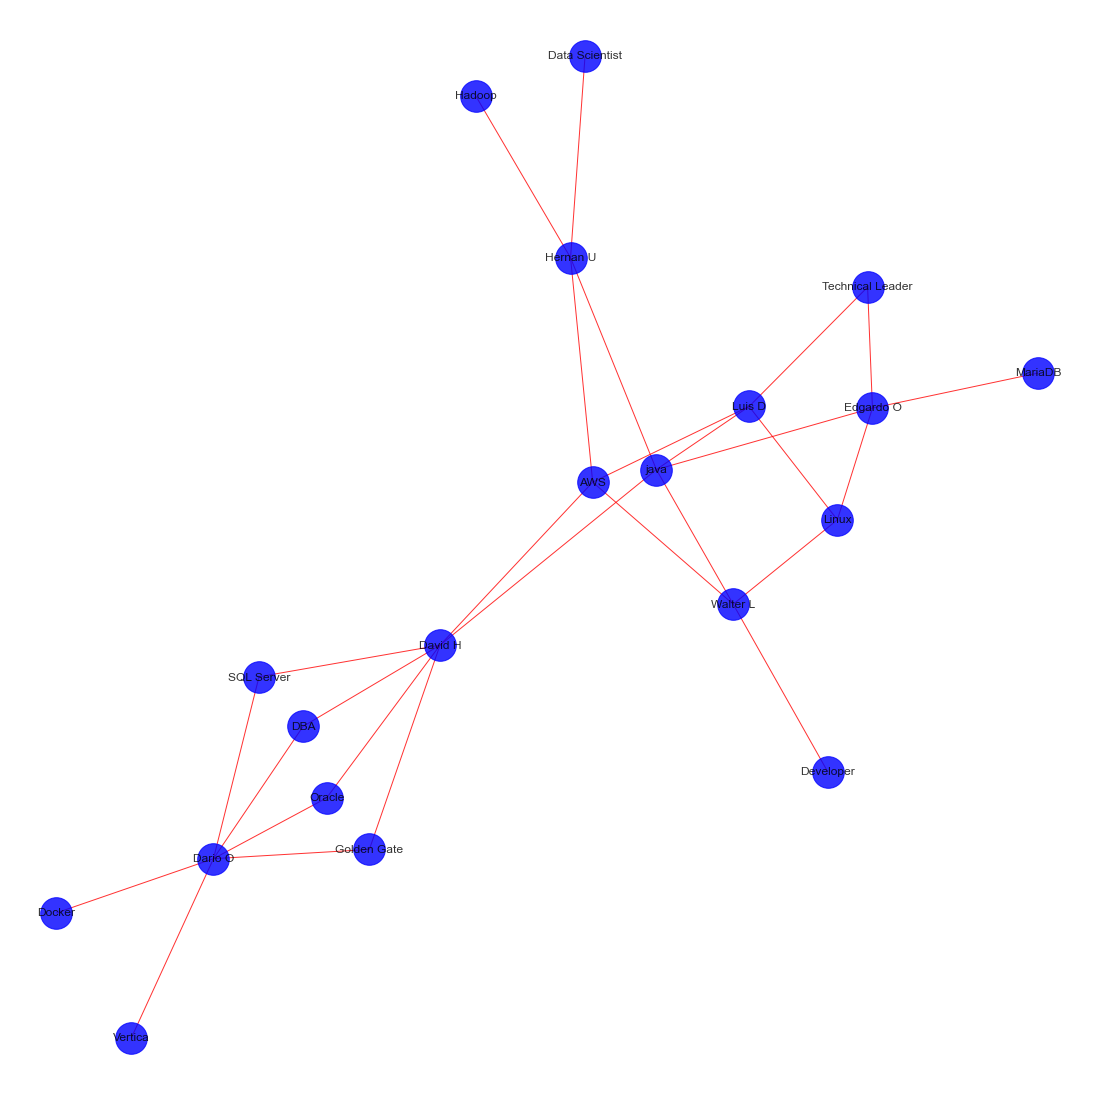

In [196]:
#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Df
df1 = df.iloc[0:30, :]
#display(df1)

#Gráfico
G = nx.from_pandas_edgelist(df1, 'name_node_a', 'name_node_b')

print(type(G))
# larger figure size
plt.figure(3,figsize=(15,15)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)

nx.draw_spring(G, with_labels=True, node_color='b', node_size=2000, alpha=0.5, edge_color="r")
plt.show()



## Estadísticas descriptivas


In [197]:
nodos.describe()

,n.age,n.experience
count,43.000000,43.000000
mean,32.023256,6.232558
std,7.753612,4.602469
min,21.000000,2.000000
25%,25.000000,3.000000
50%,33.000000,5.000000
75%,37.000000,8.000000
max,52.000000,27.000000


In [198]:
relaciones.describe()

,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
count,383,383,383,383,383
unique,93,93,100,99,383
top,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,4d4f1a5ddf83da52f2ef70d8ba50ec52-c81e728d9d4c2...
freq,16,16,32,32,1


In [199]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
id_node_a,object
name_node_a,object
id_node_b,object
name_node_b,object
id_relationship,object


In [200]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas.head(5))

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


In [201]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
n.id,object
name_node_a,object
n.type,object
n.category,object
n.gender,object
n.age,float64
n.experience,float64


Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [202]:
personas.describe()

Campo,n.age,n.experience
count,43.000000,43.000000
mean,32.023256,6.232558
std,7.753612,4.602469
min,21.000000,2.000000
25%,25.000000,3.000000
50%,33.000000,5.000000
75%,37.000000,8.000000
max,52.000000,27.000000


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [203]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

,index,n.gender
0,male,0.72093
1,female,0.27907


In [204]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

,index,n.category
0,senior,0.418605
1,semi-senior,0.325581
2,junior,0.255814


Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [205]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [206]:
display(resultante.head())

Campo,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,AWS,799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...
1,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...
2,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,43b6f263edd9539008d17939797e828c-a87ff679a2f3e...,Golden Gate,d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...
3,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...
4,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...,Oracle,fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...


Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [207]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]
resultante.sample(3)

Campo,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
207,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,person,semi-senior,female,34.0,4.0,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,5a60db78bfff70a747e7f2583f4e2a49-c81e728d9d4c2...
204,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,6af6b7650a408be285b2b0eca18d7e28-c81e728d9d4c2...
194,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,6298995c69fbd7f057e5b770086e770b-c81e728d9d4c2...


# 2. Análisis exploratorio y curación de datos

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).



a.

In [208]:
pd.Series(nodos.index, dtype=str).describe()

count     43
unique    43
top       35
freq       1
dtype: object

In [209]:
nodos[nodos.index.duplicated()]

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience


In [210]:
pd.Series(relaciones.index, dtype=str).describe()

count     383
unique    383
top       359
freq        1
dtype: object

In [211]:
relaciones[relaciones.index.duplicated()]

Campo,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship


Conclusión: no hay índices/ids/claves duplicados.

b.

In [212]:
nodos[nodos.duplicated()]

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience


In [213]:
relaciones[relaciones.duplicated()]

Campo,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship


c.

In [214]:
display(nodos.columns[~nodos.columns.str.match(r'^(\w+)$')])

Index(['n.id', 'n.type', 'n.category', 'n.gender', 'n.age', 'n.experience'], dtype='object', name='Campo')

In [215]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos.head()

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


In [216]:
display(relaciones.columns[~relaciones.columns.str.match(r'^(\w+)$')])

Index([], dtype='object', name='Campo')

d.

In [217]:
import ftfy.badness as bad

In [218]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [219]:
for c in nodos.columns:
    name = c+'weirdness'
    nodos[name] = nodos[c].apply(weird)
    print(nodos[nodos[name] > 1].count())

Campo
n_id             0
name_node_a      0
n_type           0
n_category       0
n_gender         0
n_age            0
n_experience     0
n_idweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
dtype: int64
Campo
n_id                    0
name_node_a             0
n_type                  0
n_category              0
n_gender                0
n_age                   0
n_experience            0
n_idweirdness           0
name_node_aweirdness    0
n_typeweirdness         0
n_categoryweirdness     0
dtype

In [220]:
for c in relaciones.columns:
    name = c+'weirdness'
    relaciones[name] = relaciones[c].apply(weird)
    print(relaciones[relaciones[name] > 1].count())

Campo
id_node_a             0
name_node_a           0
id_node_b             0
name_node_b           0
id_relationship       0
id_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
dtype: int64
Campo
id_node_a               0
name_node_a             0
id_node_b               0
name_node_b             0
id_relationship         0
id_node_aweirdness      0
name_node_aweirdness    0
id_node_bweirdness      0
name_node_bweirdness    0
dtype: int64
Campo
id_node_a                   0
name_node_a                 0
id_node_b                   0
name_node_b                 0
id_relationship             0


e.

In [221]:
nodos[(nodos.n_type == 'team') & (nodos.n_age != 0)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [222]:
nodos[(nodos.n_type == 'person') & (nodos.n_age == 0)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [223]:
nodos[(nodos.n_type == "person") & (nodos.n_age < nodos.n_experience)]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


f.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2e08985c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe2e0898d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2e08982b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2e0a0e4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2e0a0e898>],
 'means': []}

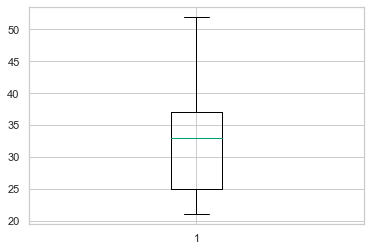

In [224]:
plt.boxplot(nodos[nodos.n_type=='person'].n_age.dropna(), whis=3)

In [225]:
outliers = nodos[nodos.n_age > (nodos.n_age.mean() + 3 * nodos.n_age.std())]
display(outliers)

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


(array([21.,  5., 10.,  4.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ]),
 <a list of 10 Patch objects>)

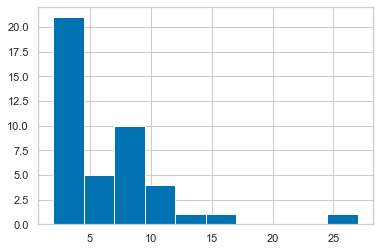

In [226]:
plt.hist(nodos[nodos.n_type=='person'].n_experience.dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2e1b6e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe2e1b6ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2e1b6e3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2e1b795f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2e1b799b0>],
 'means': []}

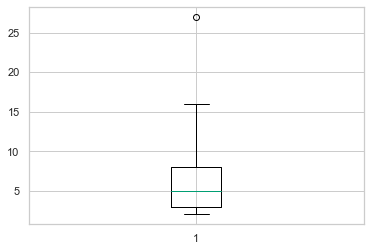

In [227]:
plt.boxplot(nodos[nodos.n_type=='person'].n_experience.dropna(), whis=3)

In [228]:
outliers = nodos[nodos.n_experience > (nodos.n_experience.mean() + 3 * nodos.n_experience.std())]
display(outliers)

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0,0,0,0,0,0,0,0


In [229]:
nodos[nodos.n_experience == 27]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0,0,0,0,0,0,0,0


Outliers: todos los valores están dentro de 3 desviaciones estándares. Hay una sola persona que cae fuera de 2 DS, con 27 años de experiencia, pero hemos decidido mantener el dato dado el tamaño de la muestra analizada. Utilizamos el criterio de 3 DS a pesar de que los datos muestrales no se distribuyan normal, por convención y falta de un mejor criterio.

g.

In [230]:
datos_faltantes_nodos_cuenta = nodos.isnull().sum()
datos_faltantes_nodos_cuenta

Campo
n_id                     0
name_node_a              0
n_type                   0
n_category               0
n_gender                 0
n_age                    0
n_experience             0
n_idweirdness            0
name_node_aweirdness     0
n_typeweirdness          0
n_categoryweirdness      0
n_genderweirdness        0
n_ageweirdness           0
n_experienceweirdness    0
dtype: int64

In [231]:
nodos[(nodos.n_type == "person") & (nodos.n_category == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [232]:
nodos[(nodos.n_type == "person") & (nodos.n_gender == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [233]:
nodos[(nodos.n_type == "person") & (nodos.n_age == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [234]:
nodos[(nodos.n_type == "person") & (nodos.n_experience == "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [235]:
nodos[nodos.n_type.isnull()]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [236]:
nodos = nodos[nodos['name_node_a'] != 'Perfiles']
nodos.head(5)

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,0,0,0,0,0,0,0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0,0,0,0,0,0,0,0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0,0,0,0,0,0,0,0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0,0,0,0,0,0,0,0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0,0,0,0,0,0,0,0


In [237]:
nodos[(nodos.n_experience == "NaN") & (nodos.n_age != "NaN")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [238]:
nodos[(nodos.n_age == "0")]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [239]:
nodos[nodos.n_category.isnull()].head()

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [240]:
nodos[nodos.n_age == 0]

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


In [241]:
nodos[nodos.n_age == 0].replace(0, 'NaN')

Campo,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience,n_idweirdness,name_node_aweirdness,n_typeweirdness,n_categoryweirdness,n_genderweirdness,n_ageweirdness,n_experienceweirdness


h.
## Preparación de datasets

In [242]:
#Recargamos los datos 
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

In [243]:
nodos.columns = nodos.columns.str.replace('.', '_')
nodos[nodos.n_age == 0].replace(0, 'NaN')
nodos.sample(3)

,n_id,name_node_a,n_type,n_category,n_gender,n_age,n_experience
46,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,technologies,NaN,NaN,NaN,NaN
63,51ffd7144fcc4ddc688bf08869913f7f-a87ff679a2f3e...,Vertica,technologies,NaN,NaN,NaN,NaN
6,f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...,Cristian G,person,senior,male,37.0,10.0


In [244]:
df_1 = nodos.merge(relaciones, left_on='n_id', right_on='id_node_a')
df_1 = df_1[df_1['n_type']=='person'][['name_node_a_x', 'name_node_b', 'n_category', 'n_age', 'n_experience']]

In [245]:
df2 = nodos[nodos.n_type=='skill'].merge(relaciones, left_on='n_id', right_on='id_node_b')
df2 = df2[['name_node_a_x', 'n_type', 'name_node_a_y', 'id_node_a', 'id_node_b']]
df2.sample(3)

,name_node_a_x,n_type,name_node_a_y,id_node_a,id_node_b
25,Developer,skill,Gabriela B,f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...
26,Developer,skill,Juan P,a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...
8,Data Scientist,skill,Natali L,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...


In [246]:
t = nodos[nodos.n_type=='technologies'].merge(relaciones)
t = t[['n_id', 'name_node_a', 'id_node_b']]

df2.merge(t, left_on='id_node_b' , right_on='id_node_b')
display(df2.sample(3))

,name_node_a_x,n_type,name_node_a_y,id_node_a,id_node_b
40,Developer,skill,Walter L,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...
1,Data Scientist,skill,Fernando,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...
20,Data Architect,skill,Perfiles,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...


In [247]:
a = nodos[nodos['n_type']=='technologies']
techs = a['name_node_a'].unique()
a = df2.merge(df_1, left_on='name_node_a_y', right_on='name_node_a_x')
display(a.sample(3))

,name_node_a_x_x,n_type,name_node_a_y,id_node_a,id_node_b,name_node_a_x_y,name_node_b,n_category,n_age,n_experience
89,DBA,skill,Luis U,b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,Luis U,SQL Server,senior,41.0,8.0
147,Developer,skill,Juan P,a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2...,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Juan P,windows,senior,45.0,11.0
70,DBA,skill,Gastón,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,Gastón,pentaho,semi-senior,27.0,3.0


# 3. Introducción al aprendizaje automático

Lo primero que tenemos que entender es la jerarquía de los datos organizados en grafos de acuerdo a lo que necesitemos.
En este caso:
* Skills: nodo tipo skill
* Personas: not tipo person
* Tecnologias: nodo tipo knowledge

Con estas vinculaciones trataremos de responder a la pregunta de la relación entre el conocimiento que poseen las personas y sus años de experiencia.


In [248]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...,Airflow,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...
1,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...,Hadoop,37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...
2,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,MariaDB,d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...
3,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...
4,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,MySQL,44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...


In [249]:
nodos['n.type'].unique()

array(['person', 'team', nan, 'technologies', 'skill', 'info'],
      dtype=object)

Trabajemos solo con los nodos Skills, Person y Technologies


In [250]:
#Definimos un dataset de skill
skills = nodos[nodos["n.type"] == "skill"]

# Mejoramos los nombres de las columnas
skills.columns = skills.columns.str.replace('n.id', 'skill_id')
skills.columns = skills.columns.str.replace('name_node_a', 'skill_name')
skills.columns = skills.columns.str.replace('n.type', 'skill_type')
# Extractamos solo las columnas necesarias
skills = skills[['skill_id','skill_name','skill_type']]
skills.sample(3)

,skill_id,skill_name,skill_type
102,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill
105,a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...,Data Engineer,skill
100,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill


In [251]:
#Definimos un dataset de personas
persons = nodos[nodos["n.type"] == "person"]
# persons['n.id']
#Mejoramos los nombres
persons.columns = persons.columns.str.replace('n.id', 'person_id')
persons.columns = persons.columns.str.replace('name_node_a', 'person_name')
persons.columns = persons.columns.str.replace('n.type', 'person_type')
persons.columns = persons.columns.str.replace('n.category', 'person_category')
persons.columns = persons.columns.str.replace('n.gender', 'person_gender')
persons.columns = persons.columns.str.replace('n.age', 'person_age')
persons.columns = persons.columns.str.replace('n.experience', 'person_experience')

persons.set_index('person_id')
persons.sample(3)

,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
33,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0


In [252]:
#Definimos un dataset de tecnologias
technologies = nodos[nodos["n.type"] == "technologies"]
#Mejoramos los nombres
technologies.columns = technologies.columns.str.replace('n.id', 'technology_id')
technologies.columns = technologies.columns.str.replace('name_node_a', 'technology_name')
technologies.columns = technologies.columns.str.replace('n.type', 'technology_type')
technologies = technologies.drop(columns='n.category',axis=1)
technologies = technologies.drop(columns='n.gender',axis=1)
technologies = technologies.drop(columns='n.age',axis=1)
technologies = technologies.drop(columns='n.experience',axis=1)
technologies.sample(3)

,technology_id,technology_name,technology_type
62,0d19f40ecc4c80ff14c2c225998be837-a87ff679a2f3e...,Spark,technologies
57,74d7bde7ea69ff4f8b8a5130ebd907f2-a87ff679a2f3e...,HBase,technologies
107,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies


In [253]:
#vamos a unir los dataset para analizarlos 
resultante = skills.merge(relaciones, left_on='skill_id', right_on='id_node_b')
resultante = resultante[['skill_id','skill_name','skill_type','id_node_a']]
resultante.set_index('id_node_a')
resultante.sample(3)

,skill_id,skill_name,skill_type,id_node_a
12,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e...
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...
36,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2...


In [254]:
# Vamos a vincular con las personas
resultante = resultante.merge(persons, left_on='id_node_a', right_on='person_id')
resultante.merge(persons, left_on='id_node_a', right_on='person_id').sample(3)


,skill_id,skill_name,skill_type,id_node_a,person_id_x,person_name_x,person_type_x,person_category_x,person_gender_x,person_age_x,person_experience_x,person_id_y,person_name_y,person_type_y,person_category_y,person_gender_y,person_age_y,person_experience_y
31,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...,50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...,Oscar H,person,semi-senior,male,33.0,2.0,50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2...,Oscar H,person,semi-senior,male,33.0,2.0
8,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,Natali L,person,semi-senior,female,24.0,4.0,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,Natali L,person,semi-senior,female,24.0,4.0
36,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0


In [255]:

# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...,Gustavo M,person,semi-senior,male,31.0,4.0
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0
12,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0


In [256]:
# Vamos a vincular con las relaciones de las tecnologias
resultante = resultante.merge(relaciones[['id_node_a','id_node_b']], left_on='person_id', right_on='id_node_a')
relaciones["name_node_a"].unique()
resultante = resultante.merge(technologies, left_on='id_node_b', right_on='technology_id')
resultante.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,id_node_a,id_node_b,technology_id,technology_name,technology_type
199,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies
151,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,Google cloud,technologies
119,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,technologies


In [257]:
# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante = resultante.drop(columns='id_node_b',axis=1)
resultante.sample(3) 

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type
183,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...,ODI,technologies
91,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2...,Rircardo I,person,semi-senior,male,22.0,5.0,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,technologies
206,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,MariaDB,technologies


In [258]:
# Calculamos la cantidad de tecnologias conocidas por cada persona y la almacenamos en el dataset de trabajo
dataset1 = resultante.groupby(['skill_name','person_gender', 'person_category','person_name','person_age','person_experience']).size().to_frame(name='Knowledge').reset_index()
dataset1.sample(3)

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
40,Technical Leader,male,senior,Edgardo O,42.0,9.0,4
26,Developer,male,junior,Matias,25.0,2.0,4
22,Developer,female,semi-senior,Andrea,27.0,3.0,11


In [259]:
#Usaremos este dataset para avanzar con los aspectos de Aprendizaje Automático
dataset1.sample(3)

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
42,Technical Leader,male,senior,Mauricio H,37.0,8.0,4
23,Developer,female,semi-senior,Luciana,34.0,4.0,4
27,Developer,male,junior,Miguel,24.0,2.0,4


In [260]:
#Listamos las tecnologías para crear columnas adicionales
newColumns = resultante['technology_name'].unique()
newColumns

array(['Docker', 'Hadoop', 'java', 'scala', 'Spark', 'AWS Lambda',
       'phyton', 'Kubernetes', 'Linux', 'MySQL', 'SQL Server', 'R',
       'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB', 'Vertica', 'ODI',
       'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL', 'MariaDB',
       'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2', 'talend',
       'neo4j'], dtype=object)

In [261]:
#Creamos un dataframe con los nombres de las nuevas columnas
dataTechnologies = pd.DataFrame(resultante,
 columns=newColumns, index=resultante['skill_id'])
dataTechnologies.sample(3)

,Docker,Hadoop,java,scala,Spark,AWS Lambda,phyton,Kubernetes,Linux,MySQL,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
skill_id,,,,,,,,,,,,,,,,,,,,,
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
#Creamos un dataset para indicar las tecnologias
dataset2 = resultante.merge(dataTechnologies, left_on='skill_id', right_on='skill_id')
dataset2.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
3618,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...,Martina S,person,junior,female,33.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10770,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,Ursula P,person,junior,female,39.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
# Eliminamos los duplicados 
dataset2 = dataset2.drop_duplicates()
dataset2.sample(3)  

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
12917,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3925,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11025,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
#Verficamos los conocimientos de una persona
dataset2[dataset2['person_name']=='Matias']

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
5435,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7155,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8015,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8875,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Datasets para aprendizaje automático
Trabajar con el dataset1 (donde el conocimiento está resumido en la columna knowlegde) y dataset2 (donde el conocimiento está armado como columnas individuales) para analizar posibles resultados


In [265]:
dataset1.sample(3)

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
16,Data Scientist,male,senior,Luciano M,26.0,8.0,5
36,Developer,male,senior,Walter L,52.0,27.0,3
12,Data Scientist,male,semi-senior,Gustavo M,31.0,4.0,5


In [266]:
dataset2.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
7671,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...,Mariana T,person,semi-senior,female,32.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12186,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

## Dataset para Problema de Clasificación Binario
Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?


In [267]:
ds_bin = df_1
ds_bin['n_category'].unique()

array(['junior', 'senior', 'semi-senior'], dtype=object)

## Dataset binarizado
Generamos dummies para la columna n_categoria. Si nos quedamos únicamente con la clasificación "Senior SI/NO" habremos binarizado el dataset.
Si la persona corresponde a la categoria senior se le asigna un 1, caso contrario se le asigna un 0.

In [268]:
aux = ds_bin['n_category'].str.get_dummies()

In [269]:
ds_bin = pd.concat([ds_bin, aux], axis=1)
ds_bin = ds_bin.drop(['junior','semi-senior'], axis=1)
display(ds_bin.sample(3))

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
19,Luis D,Linux,senior,33.0,8.0,1
186,Marcela,windows,junior,23.0,3.0,0
0,David H,AWS,junior,29.0,3.0,0


## Label encoder
Codificamos las columnas name_node_a_x y name_node_b para poder compatibilizar nuestro dataset con scikitlear

In [270]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for column in ['name_node_a_x', 'name_node_b', 'n_category']:
    ds_bin[column] = lb_make.fit_transform(ds_bin[column])
ds_bin.head()

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
0,5,0,0,29.0,3.0,0
1,5,3,0,29.0,3.0,0
2,5,8,0,29.0,3.0,0
3,5,28,0,29.0,3.0,0
4,5,17,0,29.0,3.0,0


In [271]:
from sklearn.utils import shuffle
ds_bin = shuffle(ds_bin)
ds_bin['senior'] = pd.to_numeric(ds_bin['senior'], downcast='float')
ds_bin.sample(3)

,name_node_a_x,name_node_b,n_category,n_age,n_experience,senior
59,8,13,0,38.0,4.0,0.0
42,6,25,2,35.0,11.0,1.0
76,24,24,2,41.0,8.0,1.0


## Scitkit Learn
Implementamos scitkit learn para el pipeline tradicional: preparación dataset en train/test, selección de modelo, entrenamiento, validación y determinación de accuracy.

In [272]:
from sklearn.model_selection import train_test_split
X, y = ds_bin[['n_age', 'n_experience']], ds_bin['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
#Chequeamos shape para comprobar que esta todo en orden
X_train.shape, X_test.shape

((210, 2), (53, 2))

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

## 3.1 Perceptron

In [273]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0)

model.fit(X_train, y_train)

Perceptron()

In [274]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [275]:
from sklearn.metrics import classification_report

print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       130
         1.0       0.76      0.84      0.80        80

    accuracy                           0.84       210
   macro avg       0.83      0.84      0.83       210
weighted avg       0.84      0.84      0.84       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        27
         1.0       0.92      0.92      0.92        26

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



In [276]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [277]:
# Always scale the input. The most convenient way is to use a pipeline. 
model = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None))

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(eta0=1, learning_rate='constant',
                               loss='perceptron', penalty=None))])

In [278]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [279]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       130
         1.0       0.89      0.64      0.74        80

    accuracy                           0.83       210
   macro avg       0.85      0.80      0.81       210
weighted avg       0.84      0.83      0.83       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        27
         1.0       1.00      0.69      0.82        26

    accuracy                           0.85        53
   macro avg       0.89      0.85      0.84        53
weighted avg       0.88      0.85      0.85        53



In [280]:
#Dado que tanto la edad como la expriencia vienen dadas en enteros, cambiamos de float a int
X_train['n_experience']=np.asarray(X_train['n_experience'], dtype=int)
X_train['n_age']=np.asarray(X_train['n_age'], dtype=int)
X_test['n_experience']=np.asarray(X_test['n_experience'], dtype=int)
X_test['n_age']=np.asarray(X_test['n_age'], dtype=int)

In [281]:
#Buscamos armar una matriz X_test_plot a partir de X_test['n_age'] y X_test['n_experience'] para graficar.
#Primero definimos una matriz nula
X_test_plot=np.zeros((2,53))
#Luego, ingresamos los datos supra mencionados
X_test_plot[0,:]=np.matrix( X_test['n_age'])
X_test_plot[1,:]=np.matrix(X_test['n_experience'])

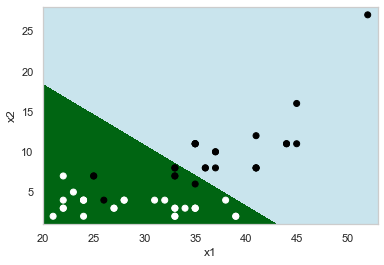

In [282]:
utils.plot_decision_boundary(lambda x: model.predict(x), X_test_plot, y_test)

## 3.2 K Nearest Neighbors ó K Vecinos Más Cercanos

In [283]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [284]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [285]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [286]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00        80

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



## 3.3 Regresión Lineal.

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [288]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

Coefficients: 
 [0.01409532 0.06608838]
Mean squared error: 0.12
Variance score: 0.52


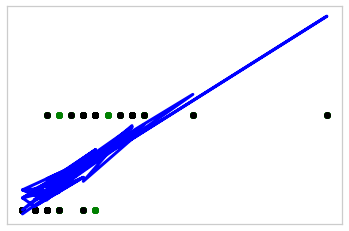

In [289]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Plot outputs
plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.plot(X_test['n_experience'], y_test_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 3.4 Regresión Logística.

In [290]:
model = SGDClassifier(loss="log", eta0=1, learning_rate="constant", penalty=None)

model.fit(X_train, y_train)

SGDClassifier(eta0=1, learning_rate='constant', loss='log', penalty=None)

In [291]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [292]:
print(f"Report para y_train")
print(classification_report(y_train, y_train_pred))
print(f"\n*2")
print(f"Report para y_test")
print(classification_report(y_test, y_test_pred))

Report para y_train
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85       130
         1.0       0.82      0.59      0.69        80

    accuracy                           0.80       210
   macro avg       0.80      0.76      0.77       210
weighted avg       0.80      0.80      0.79       210


*2
Report para y_test
              precision    recall  f1-score   support

         0.0       0.72      0.96      0.83        27
         1.0       0.94      0.62      0.74        26

    accuracy                           0.79        53
   macro avg       0.83      0.79      0.78        53
weighted avg       0.83      0.79      0.79        53



In [293]:
display(model.coef_)
bound = X_test.dot(model.coef_.T)
print(bound)

array([[-51.96182645, 252.0466707 ]])

               0
130  -587.105014
209  1694.464541
111 -1210.646931
275  -446.744458
228 -1062.523913
16    301.633093
109  -602.629937
40    953.849452
35    597.879129
125  -238.897152
99  -1522.417890
77   -134.973499
75   -114.061519
258    49.586422
20    301.633093
113 -1210.646931
136  -387.020170
120   465.281034
286  -646.829302
36    597.879129
147  -654.591763
200   486.193014
124  -238.897152
274  -446.744458
242   894.125164
127  -238.897152
10  -1010.562087
72   -114.061519
91   -958.600261
93   -958.600261
76   -114.061519
233  -742.990493
64    145.747614
205   486.193014
101    93.785787
289  -646.829302
88     65.111345
226 -1062.523913
216 -1062.523913
97  -1522.417890
63    145.747614
41    953.849452
7    4103.245134
42    953.849452
59   -966.362722
261    49.586422
143   434.231188
27    621.166513
39    953.849452
264  -306.383901
117  -342.820805
121   465.281034
137  -387.020170


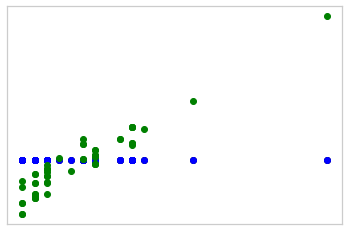

In [294]:
# Plot outputs
#plt.scatter(X_train['n_experience'], y_train,  color='green')
plt.scatter(X_test['n_experience'], y_test,  color='black')
plt.scatter(X_test['n_experience'], y_test_pred, color='blue')
plt.scatter(X_test['n_experience'],bound.T, color='green')


plt.xticks(())
plt.yticks(())

plt.show()

Param Grid aplicado sobre el modelo de Regresión Logística

In [295]:
param_grid = {
    'loss': ['log'],
    'penalty':['None', 'l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0':[0.00000001, 0.000001, 0.0001, 0.01]
}

## ParameterGrid

In [296]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
 #   print(params)
    model = SGDClassifier(**params, random_state=0)

## GridSearch
Análisis con GridSearch para regresión logística

In [297]:
from sklearn.model_selection import GridSearchCV

model = model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [298]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("loss\penalty\alpha\learning_rate\eta0\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['loss']}\t{p['penalty']}\t{p['alpha']}\t{p['learning_rate']}\t{p['eta0']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

loss\penaltylpha\learning_rate\eta0	| mean	std	rank
log	None	0.0001	constant	1e-08	| 0.60	0.00	37
log	l2	0.0001	constant	1e-08	| 0.60	0.00	37
log	None	0.0001	invscaling	1e-08	| 0.60	0.00	37
log	l2	0.0001	invscaling	1e-08	| 0.60	0.00	37
log	None	0.0001	adaptive	1e-08	| 0.60	0.00	37
log	l2	0.0001	adaptive	1e-08	| 0.60	0.00	37
log	None	0.0001	constant	1e-06	| 0.60	0.00	37
log	l2	0.0001	constant	1e-06	| 0.60	0.00	37
log	None	0.0001	invscaling	1e-06	| 0.60	0.00	37
log	l2	0.0001	invscaling	1e-06	| 0.60	0.00	37
log	None	0.0001	adaptive	1e-06	| 0.60	0.00	37
log	l2	0.0001	adaptive	1e-06	| 0.60	0.00	37
log	None	0.0001	constant	0.0001	| 0.84	0.01	8
log	l2	0.0001	constant	0.0001	| 0.84	0.01	8
log	None	0.0001	invscaling	0.0001	| 0.60	0.01	31
log	l2	0.0001	invscaling	0.0001	| 0.60	0.01	31
log	None	0.0001	adaptive	0.0001	| 0.83	0.01	20
log	l2	0.0001	adaptive	0.0001	| 0.83	0.01	20
log	None	0.0001	constant	0.01	| 0.80	0.09	26
log	l2	0.0001	constant	0.01	| 0.80	0.09	26
log	None	0.0001	invscaling	0.01	|

Los mejores modelos tienen un accuracy promedio del 0.06 con una stdv de 0.4, Sin usar función de pérdida, y con una tasa adaptativa de la learnning rate.


# 4. Aprendizaje Supervisado


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

In [299]:
dataset2.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
7671,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4747,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,person,semi-senior,female,27.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
dataset3 = pd.get_dummies(dataset2, columns=['technology_name'])
dataset3.sample(3)

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
3617,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...,Martina S,person,junior,female,33.0,3.0,...,0,0,0,0,0,0,0,0,0,0
11584,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1316,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...,Hugo S,person,semi-senior,male,23.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
dataset3 = dataset3.groupby('person_id').max()
dataset3.sample(3)

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,Ursula P,person,junior,female,39.0,5.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,...,0,1,0,0,0,0,0,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Natali L,person,semi-senior,female,24.0,4.0,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Andrea,person,semi-senior,female,27.0,3.0,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,...,0,0,0,0,1,0,0,0,0,0


## Dataset para Problema de Clasificación Múltiple
Ahora encararemos nuestro problema original es uno de clasificación múltiple,  en donde nuestro objetivo será usar la variable person_category:

1 = person_category = junior

2 = person_category = semi-senior

3 = person_category = senior


Es decir, queremos predecir el perfil de las personas. En base a esta definición.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

In [302]:
#Primero generamos una función para pasar los valores a numéricos:
mapper = {"semi-senior":2,
                  "senior":3,
                  "junior":1,}

dataset3['person_category'] = dataset3['person_category'].replace(mapper)


In [303]:
dataset3.sample(3)

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Natali L,person,2,female,24.0,4.0,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f636f067f89cc14862c,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,Luis D,person,3,male,33.0,8.0,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Armando I,person,2,male,23.0,8.0,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0


In [304]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [305]:
valid_columns = ['person_category', 'person_age', 'person_experience',
       'technology_name_AWS Lambda', 'technology_name_Azure',
       'technology_name_Docker', 'technology_name_EC2',
       'technology_name_Golden Gate', 'technology_name_Google cloud',
       'technology_name_Hadoop', 'technology_name_Kubernetes',
       'technology_name_Linux', 'technology_name_MariaDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_talend',
       'technology_name_unix', 'technology_name_windows']

In [306]:
df = dataset3.drop(columns =['skill_id',
                             'skill_name',
                             'skill_type', 'person_name', 'person_type', 'person_gender', 
       'technology_id', 'technology_type', 'AWS Lambda', 'phyton', 'Docker','scala', 'AWS', 'MongoDB',
       'Kubernetes', 'Linux', 'Spark', 'MySQL', 'SQL Server', 'R', 'Vertica',
       'ODI', 'windows', 'Golden Gate', 'Oracle', 'Oracle Cloud', 'SQL',
       'java', 'pentaho', 'Hadoop', 'MariaDB', 'Redis', 'Azure',
       'Google cloud', 'PostgreSQL', 'unix', 'S3', 'EC2', 'talend', 'neo4j'])

In [307]:
df.sample(3)

,person_category,person_age,person_experience,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c,2,28.0,4.0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f636f067f89cc14862c,2,33.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c,3,34.0,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


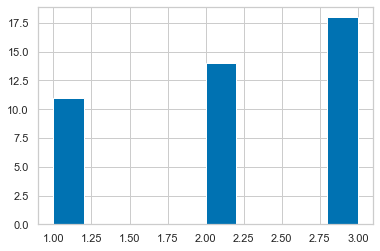

In [308]:
df.person_category.hist()

**BALANCE DE CLASES**: las clases 2 y 3 estan balanceadas, pero dado los pocos datos, la clase 1 no, ya que tiene un 61% de la clase 3.

### Mezca Aleatória y División en Train/Test
Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: X_train, X_test, y_train y y_test.


In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X, y = df.drop(columns=['person_category']), df['person_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
X_train.shape, X_test.shape

((34, 34), (9, 34))

In [311]:
X.drop(columns=[])
X.sample(3)

,person_age,person_experience,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f636f067f89cc14862c,33.0,2.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f636f067f89cc14862c,52.0,27.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c,28.0,4.0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [312]:
firstcolumns=['person_category','person_age','person_experience','technology_name_EC2','technology_name_Spark','technology_name_Vertica']

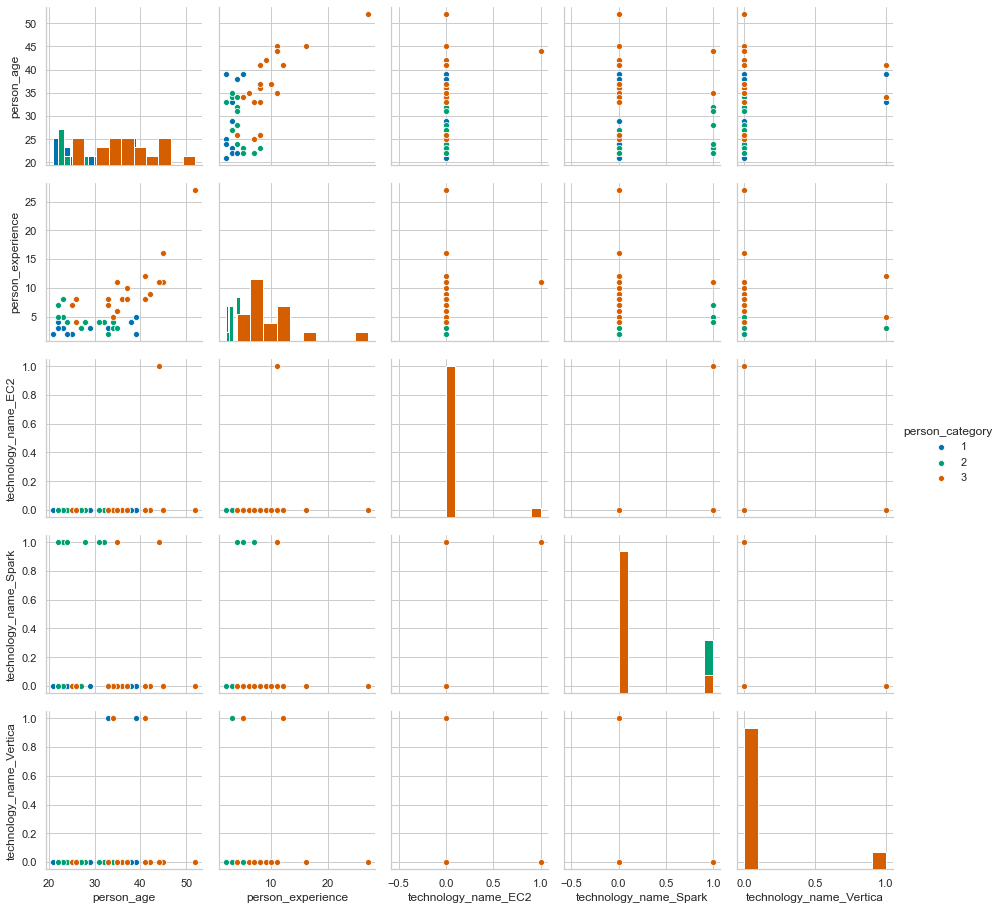

In [313]:
sns.pairplot(df[firstcolumns], hue="person_category", diag_kind = "hist")
#plt.savefig("Correlaciones Pearson.jpg")

## 4.1 SVM

In [314]:
from sklearn.svm import SVC
%matplotlib inline

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
#import utils

In [315]:
svm = SVC( 
        C=1.0, 
        kernel='rbf', 
        degree=3, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        #break_ties=False, 
        random_state=None
        )

In [316]:
svm.fit(X_train,y_train)

SVC()

In [317]:
svm.predict(X_test)

array([3, 2, 3, 2, 2, 3, 2, 2, 3])

In [318]:
y_test

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64

El SVM predijo correctamente 5 de 9 puntos.

In [319]:
svm.score(X_test, y_test, sample_weight=None)

0.5555555555555556

GRÁFICO: No se puede, es 36 dimensional.

In [320]:
#utils.plot_decision_boundary(lambda x: svm.predict(X_test_plot), X_test_plot, (y_test[1],y_test[2]))
#predictions = svm.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Vector de BIAS: En este caso el parámetro de regularización es el "C", que utiliza una penalidad cuadrádtica l2. Para optimizarlo usamos gridsearch.

## 4.2 RANDOM FOREST

In [321]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(X_test)
print(y_test)

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64


In [322]:
clf.score(X_test, y_test, sample_weight=None)

0.6666666666666666

Este modelo predice bien el 100% de los casos. Por ende y por el mismo diseó del algoritmo, no vemos necesidad de optimización a primera vista. De todas maneras para cumplir con la consigna, si resultase ser el modelo elegido se lo procesará según lo indicado.

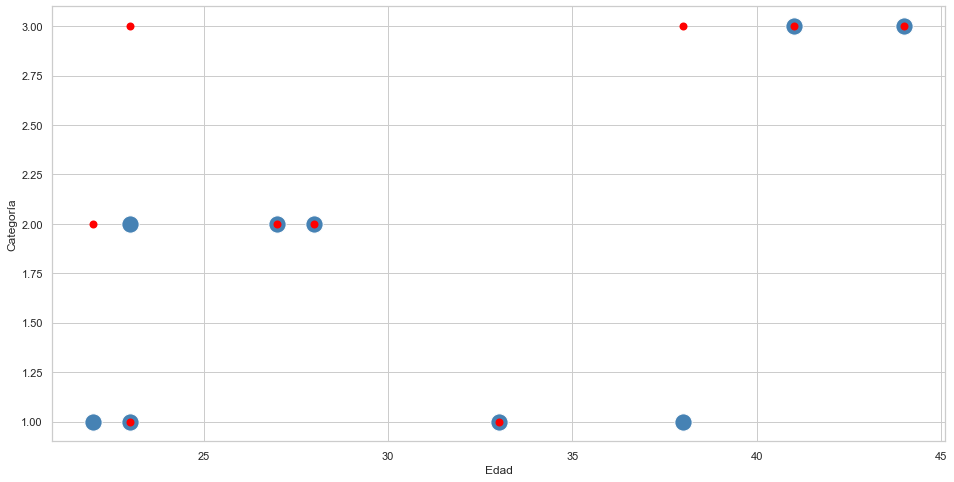

In [323]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test['person_age'], y_test, c='steelblue',
            edgecolor='white', s=300)
plt.scatter(X_test['person_age'], clf.predict(X_test),
         color='red', lw=2)
plt.xlabel('Edad')
plt.ylabel('Categoría')
plt.show()

## 4.3 NEURAL NETWORK

In [324]:
from sklearn import neural_network
import matplotlib.pyplot as plt

In [325]:
clf = neural_network.MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(5, 2), 
    random_state=1, 
    max_iter=5000
)

In [326]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=5000,
              random_state=1, solver='lbfgs')

In [327]:
clf.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3])

In [328]:
clf.score(X_test, y_test)

0.2222222222222222

La Red Neuronal tuvo el **peor** resultado de los modelos, prediciendo solo un tercio de los casos.

## Selección del modelo

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

Descripción de la Hipótesis ¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

Selección de Regularizador ¿Utilizarán algún regularizador?¿Cuál?

Selección de Función de Costo ¿Cuál será la función de costo utilizada?

Justificación de las Selecciones ¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning). Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?


**Hipótesis**: El problema es clasificar el seniority de las personas, medido a través de "person_category", en función de la cantidad de tecnologías conocidas principalemente. La hipótesis nula es que a mayor número de tecnologías conocidas, mayor será la seniority. Adicionalmente se puede contemplar los años de experiencia de trabajo de cada individuo, siendo un factor clave para determinar el nivel de seniority.

**Selección de Regulizador**: los regulizadores tienen sentido en los modelos lineales, para evitar el overfitting de los modelos que lleva a la pérdida de capacidad predictiva fuera de la muestra de entrenamiento. Dado que se opta por un random forest esto se puede atacar desde varios parámetros del modelo. Para empezar, se puede determinar la profundidad máxima que puede tener cada árbol envitando el overfit. También es posible determinar el número mínimo de muestras para poder generar un split, si por ejemplo ese número es 10, no se podrá generar un nuevo split si se llega a una hoja con menos de ese número de datos. Otra forma de verlo, es poniendo un mínimo al número de muestras remanentes que quedarán en cada hoja final. Todos estos parámetros pueden ser optimizado con el uso de GridSearch

**Selección de Función de Costo**: Para el caso de Random Forest las funciones de costo pueden ser GINI o ENTROPIA. El costo de GINI es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. , mientras que el de entropía es una medida de ganancia de información. Ambos serán evaluados a través de la optimización con GridSearch.

**Justificación**: Seleccionamos este modelo porque trás correr las primeras pruebas, parece ser el que mejor uso hace de las dummies de tecnología para poder generar la clasificación.

In [329]:
rfc = RandomForestClassifier(random_state=0)

param_grid = { 
    'criterion':('gini', 'entropy'),
    'max_depth': (2, 3, 4),
    'min_samples_leaf':(1, 2, 3),
    'min_samples_split':(2, 3, 5)
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

CV_rfc.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 3, 4), 'min_samples_leaf': (1, 2, 3),
                         'min_samples_split': (2, 3, 5)})

In [330]:
CV_rfc.best_score_

0.7206349206349206

In [331]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [332]:
y_predicted = CV_rfc.best_estimator_.predict(X_test)

In [333]:
import sklearn.metrics as metrics

In [334]:
metrics.confusion_matrix(y_test, y_predicted)

array([[4, 0, 0],
       [0, 2, 1],
       [0, 0, 2]])

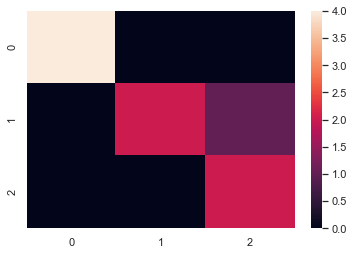

In [335]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted))

In [336]:
'''
metrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)
plt.show()     
'''

'\nmetrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)\nplt.show()     \n'

Las curvas ROC no se pueden graficar en virtud de que estamos en un problema de clasificación multiclase. Para poder utilizar esta herramienta debe generarse un problema de clasificación binario del tipo 1 vs all.

Respecto a si es correcto utilizar Accuracy, Recall o una mezcla de ambas como métrica, nos inclinamos por Balanced Accuracy dado que queremos mejorar la precisión de las etiquetas pero dentro de un dataset desbalanceado.

In [337]:
metrics.balanced_accuracy_score(y_test, y_predicted)

0.8888888888888888

La métrica llega a un valor óptimo.

## 5. Aprendizaje No Supervisado

Nos concetraremos en intentar encontrar las tecnologías que determinan a un "Data Scientist", y luego intentaremos montar un sistema de recomendación de tecnologías para que los recursos humanos puedan formarse como científicos de datos.

In [338]:
skills = df.drop(columns=['person_category', 'person_age', 'person_experience'])

In [339]:
# Create correlation matrix
corr_matrix = skills.corr().abs()

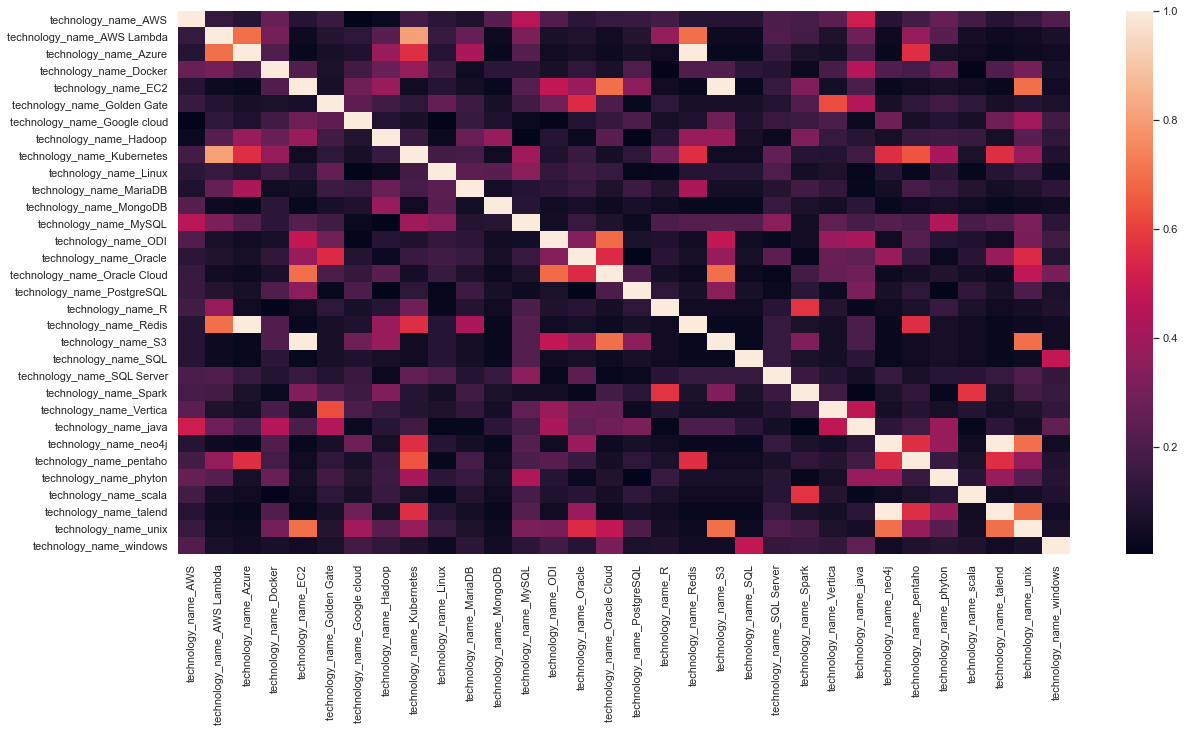

In [340]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

A priori, no se ven relaciones claras entre diferentes tecnologías.

¿Que skills tienen los Data Scientists?

In [341]:
data_scientists = dataset3[dataset3['skill_name']=='Data Scientist']
data_scientists.sample(3)

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Fernando,person,2,male,28.0,4.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,...,1,0,0,0,0,1,0,0,0,0
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Diego M,person,3,male,35.0,11.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,...,1,0,1,0,0,0,1,0,0,0
ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Luciano M,person,3,male,26.0,8.0,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0


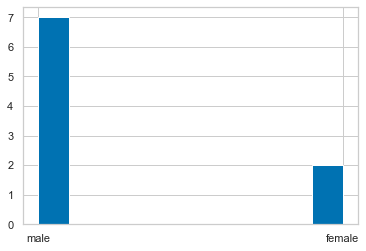

In [342]:
data_scientists['person_gender'].hist()

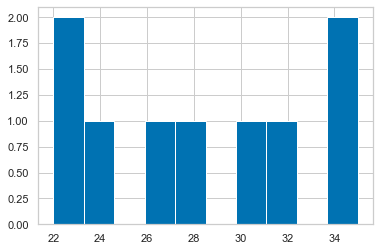

In [343]:
data_scientists['person_age'].hist()

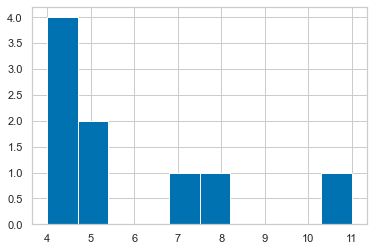

In [344]:
data_scientists['person_experience'].hist()

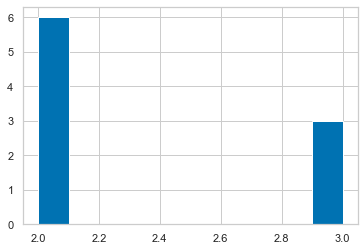

In [345]:
data_scientists['person_category'].hist()

Los Data Scientist son mayormente hombres, con experiencia entre semi-senior o senior. No hay Juniors DS.

In [346]:
means = dataset3.groupby('skill_name').mean()
means = means[['person_category','person_age','person_experience', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']]
means

,person_category,person_age,person_experience,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
skill_name,,,,,,,,,,,,,,,,,,,,,
DBA,2.111111,34.666667,5.555556,0.222222,0.000000,0.000000,0.333333,0.000000,0.777778,0.000000,...,0.000000,0.444444,0.333333,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.222222
Data Scientist,2.333333,28.333333,5.777778,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.222222,...,0.777778,0.111111,0.666667,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000,0.000000
Developer,1.894737,30.684211,6.263158,0.368421,0.052632,0.052632,0.368421,0.000000,0.000000,0.315789,...,0.000000,0.000000,0.684211,0.000000,0.052632,0.157895,0.000000,0.000000,0.000000,0.105263
Technical Leader,2.833333,37.833333,7.833333,0.333333,0.000000,0.000000,0.500000,0.166667,0.000000,0.333333,...,0.166667,0.000000,0.833333,0.166667,0.166667,0.166667,0.000000,0.166667,0.333333,0.000000


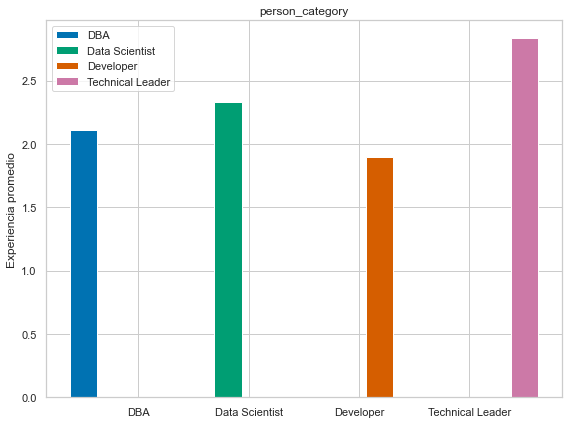

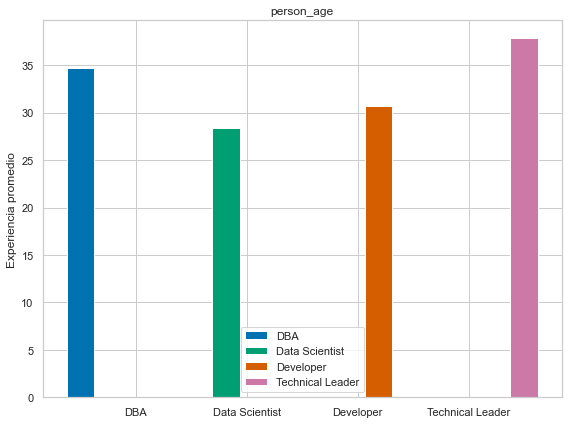

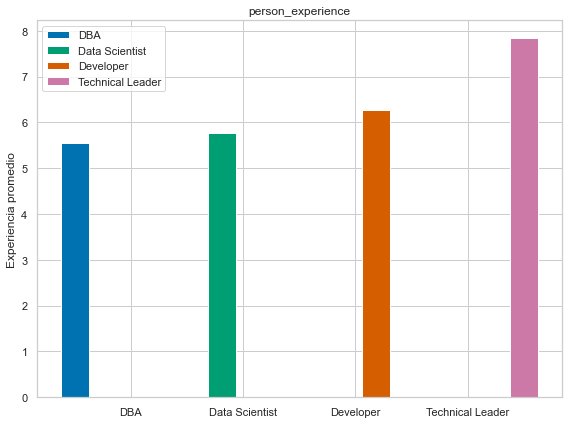

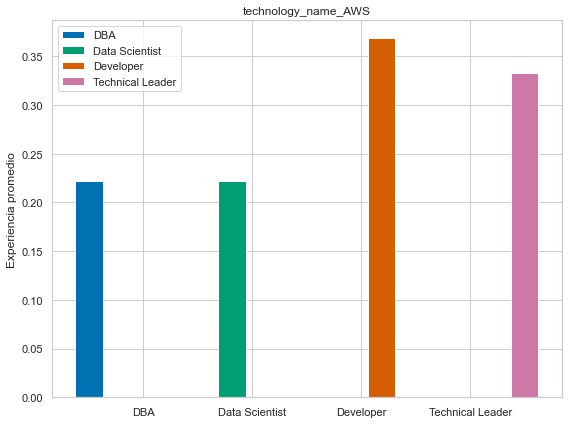

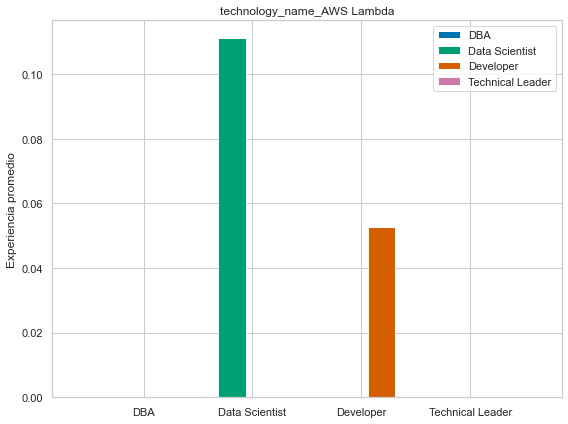

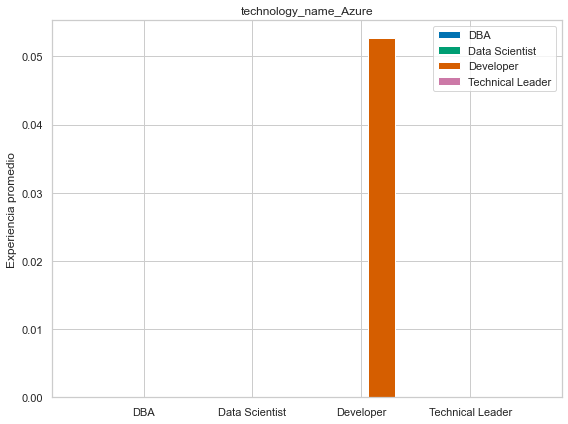

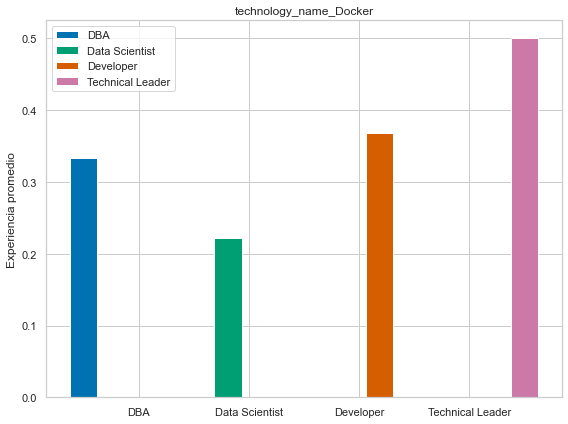

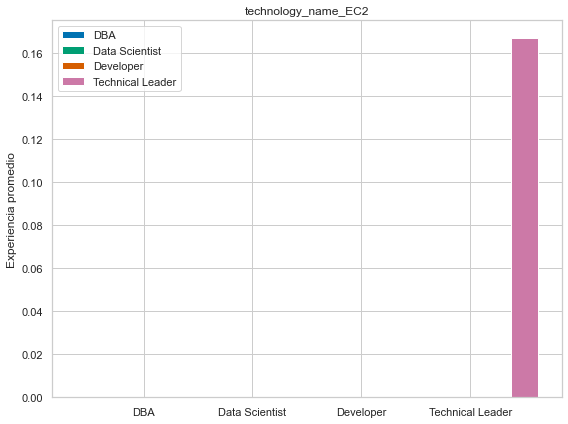

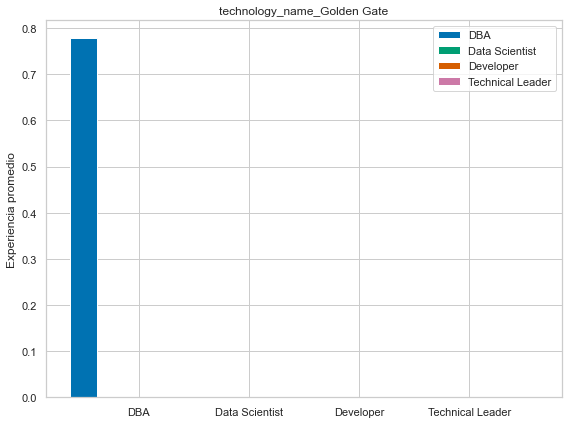

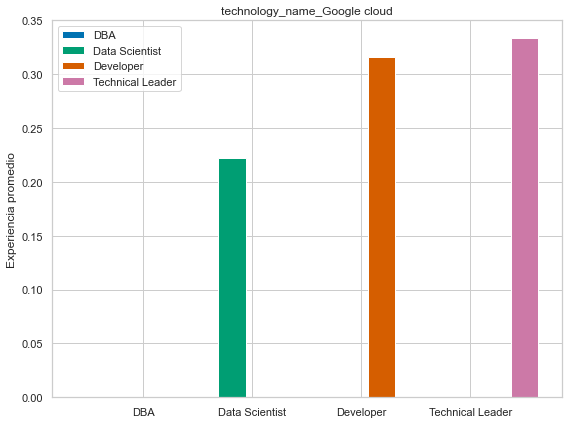

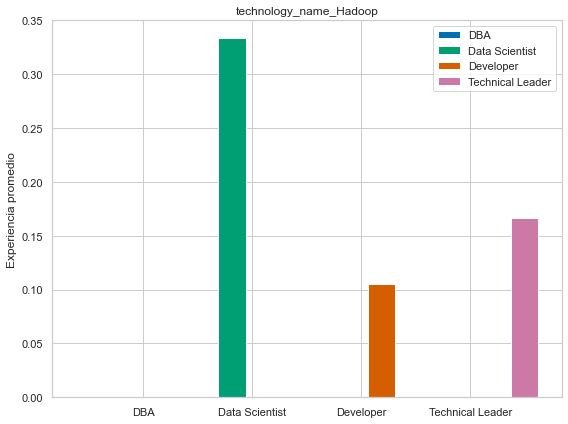

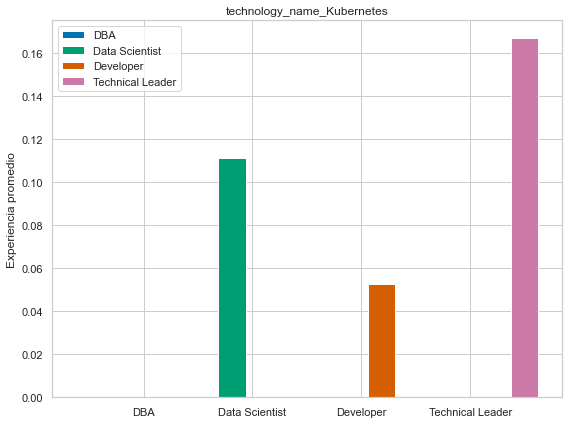

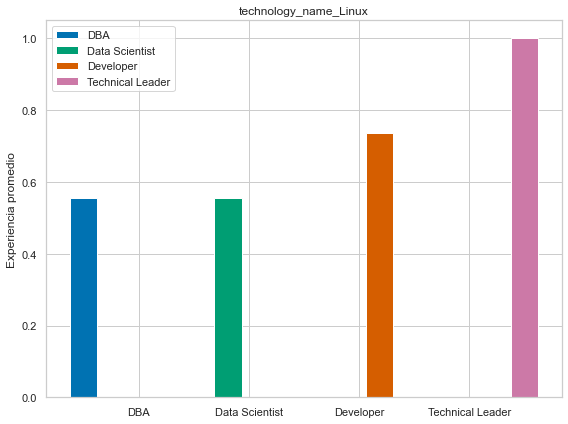

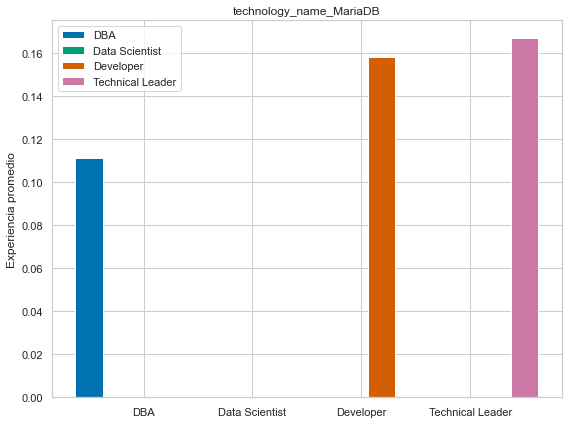

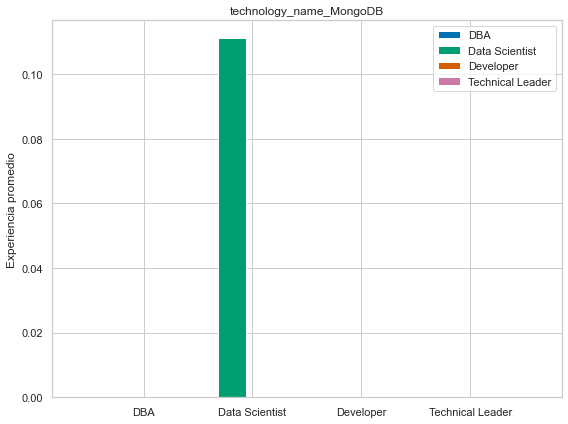

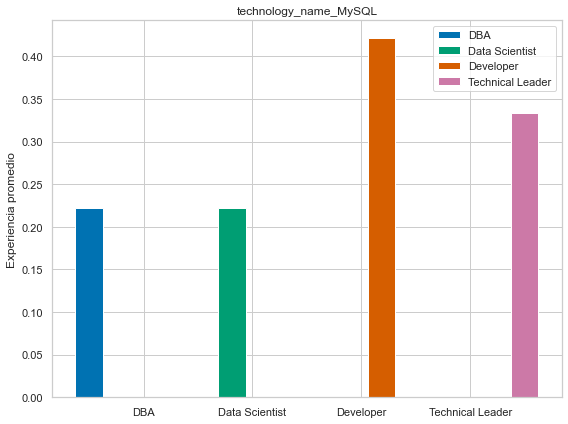

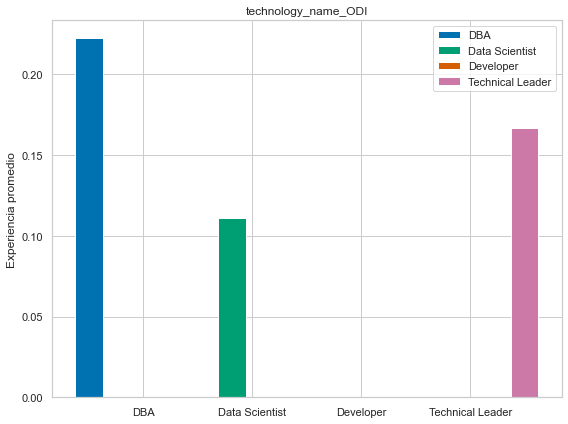

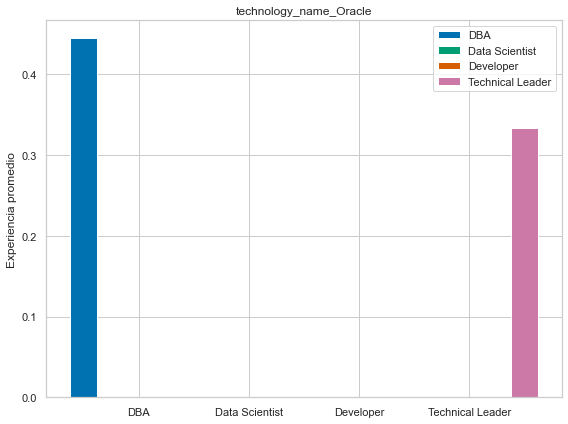

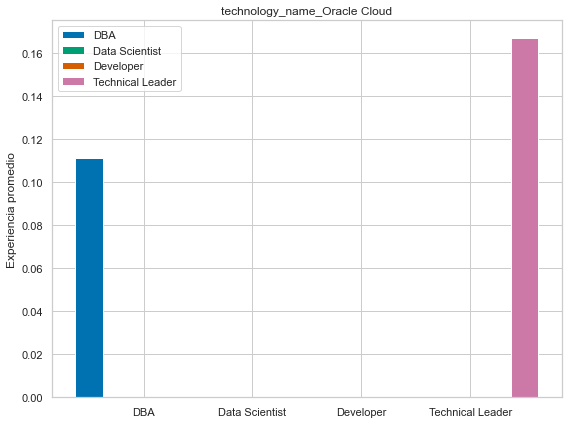

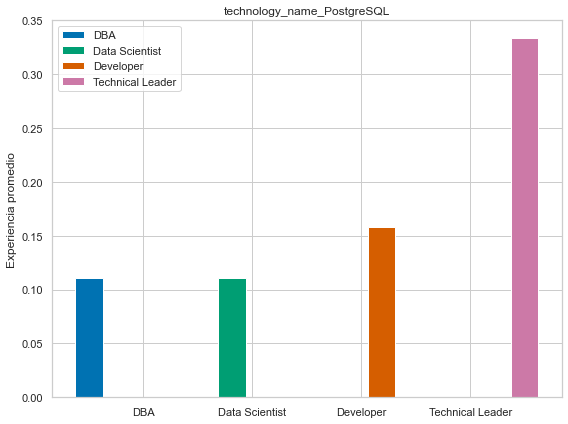

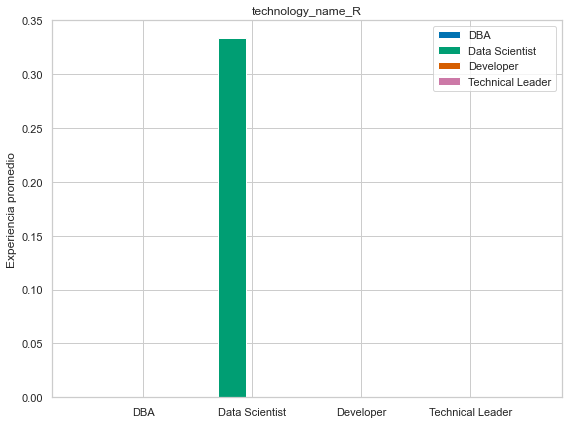

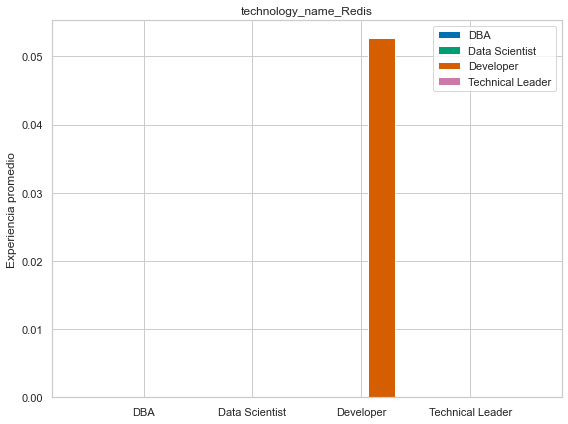

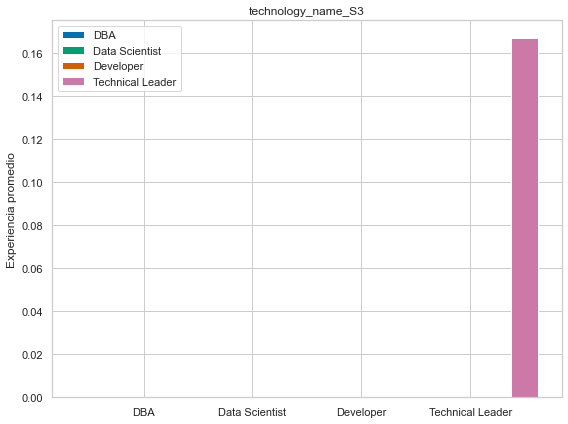

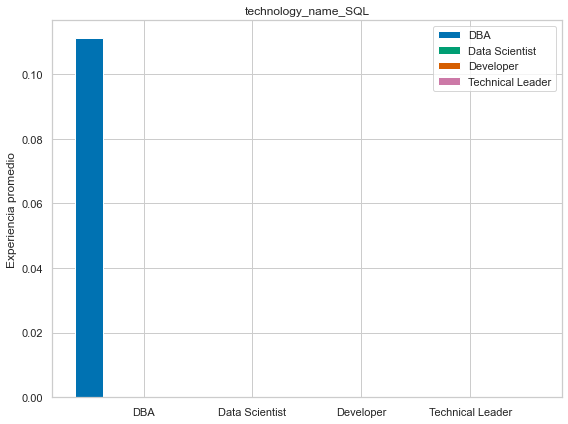

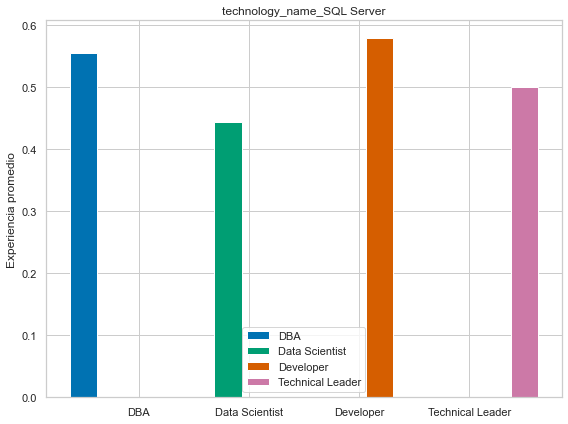

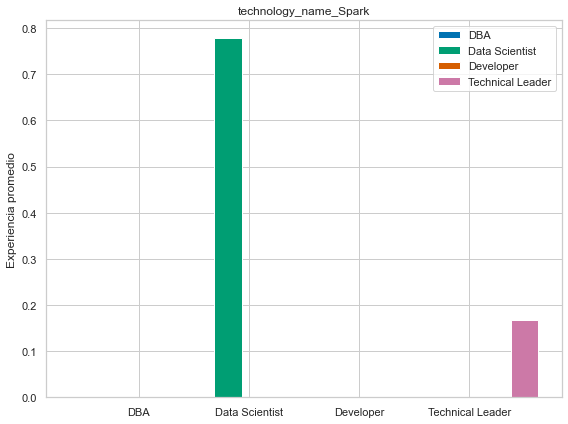

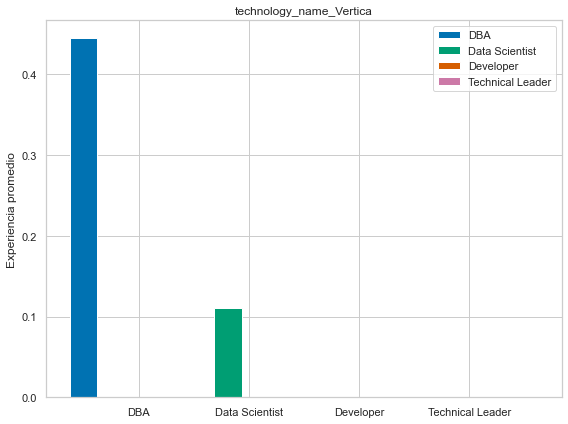

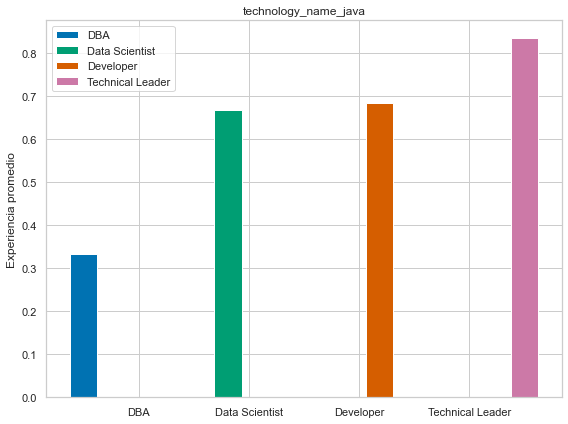

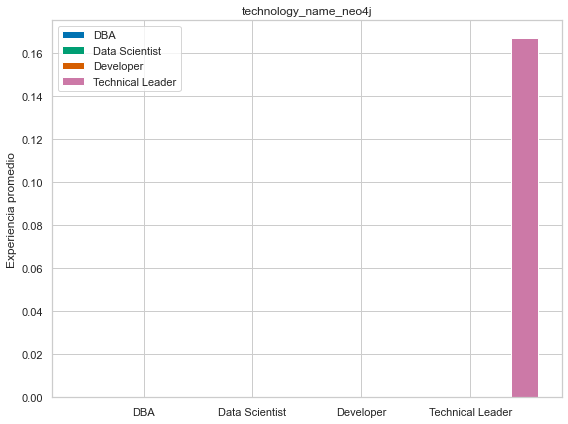

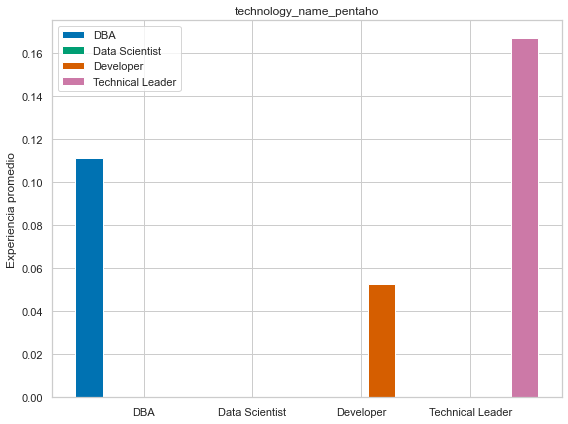

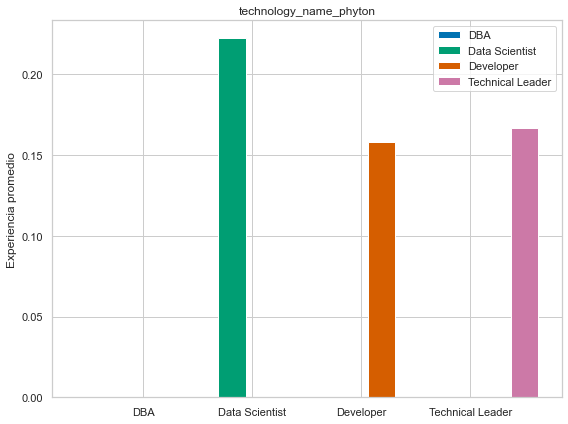

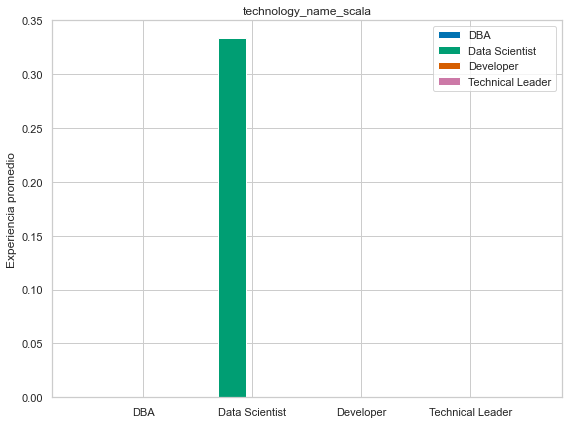

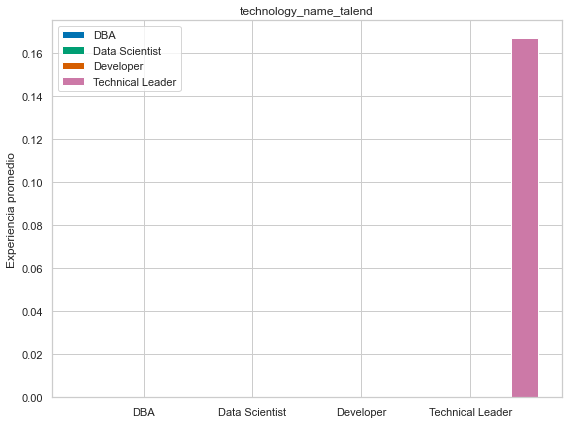

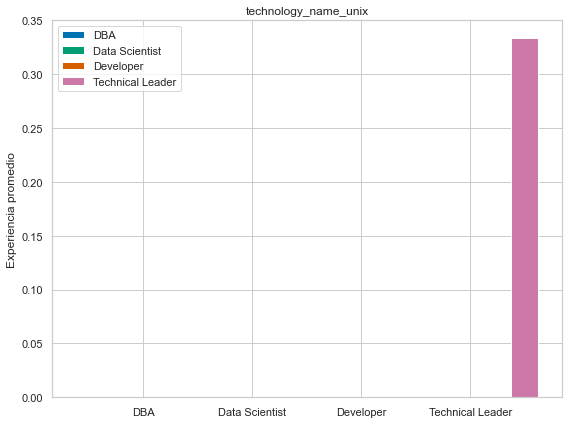

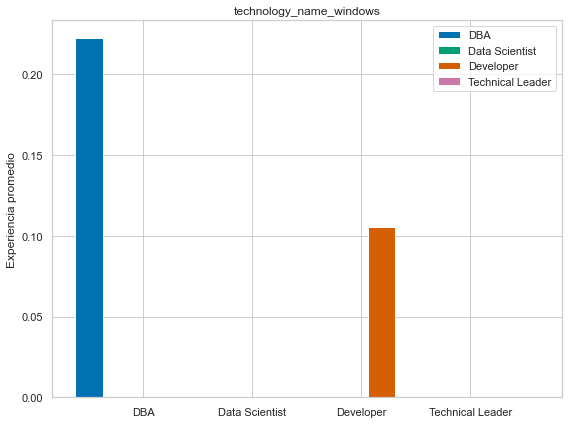

In [347]:
for c in means.columns:

    labels = list(means.index)
    dba_means = means[c].loc['DBA']
    ds_means = means[c].loc['Data Scientist']
    dev_means = means[c].loc['Developer']
    tl_mean = means[c].loc['Technical Leader']

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,6))
    rects1 = ax.bar(x[0] - 2 * width, dba_means, width, label='DBA')
    rects2 = ax.bar(x[1] - 0.75 * width, ds_means, width, label='Data Scientist')
    rects3 = ax.bar(x[2] + 0.75 *width, dev_means, width, label='Developer')
    rects4 = ax.bar(x[3] + 2* width, tl_mean, width, label='Technical Leader')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Experiencia promedio')
    ax.set_title(c)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    #autolabel(rects1)
    #autolabel(rects2)
    #autolabel(rects3)
    #autolabel(rects4)

    fig.tight_layout()

    plt.show()

In [348]:
skills.columns

Index(['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows'],
      dtype='object')

In [349]:
techs = data_scientists[['technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_scala',
       'technology_name_talend', 'technology_name_unix',
       'technology_name_windows']].sum()
techs

technology_name_AWS             2
technology_name_AWS Lambda      1
technology_name_Azure           0
technology_name_Docker          2
technology_name_EC2             0
technology_name_Golden Gate     0
technology_name_Google cloud    2
technology_name_Hadoop          3
technology_name_Kubernetes      1
technology_name_Linux           5
technology_name_MariaDB         0
technology_name_MongoDB         1
technology_name_MySQL           2
technology_name_ODI             1
technology_name_Oracle          0
technology_name_Oracle Cloud    0
technology_name_PostgreSQL      1
technology_name_R               3
technology_name_Redis           0
technology_name_S3              0
technology_name_SQL             0
technology_name_SQL Server      4
technology_name_Spark           7
technology_name_Vertica         1
technology_name_java            6
technology_name_neo4j           0
technology_name_pentaho         0
technology_name_phyton          2
technology_name_scala           3
technology_nam

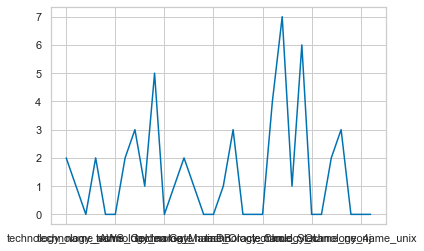

In [350]:
techs.plot()

In [351]:
'''
Sabemos que hay 4 potenciales clusters optimos, por los tipos de perfiles. Intentaremos agruparlos según las tecnologías que cada uno conoce.
'''

dataset3.skill_name.unique()

array(['Technical Leader', 'Data Scientist', 'DBA', 'Developer'],
      dtype=object)

In [352]:
# Buscamos los clusters para los jugadores

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  96.48095238095237


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

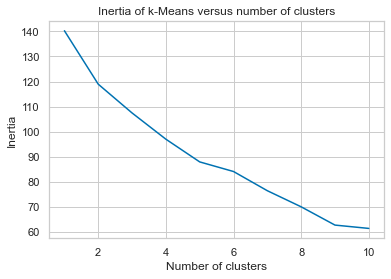

In [353]:
# Buscamos el hiperparámetro 'n_clusters', variando de 1 a 11 clusters

#Metemos la función scores dentro del grafico
scores = [KMeans(n_clusters=i+1).fit(skills).inertia_ for i in range(10)]
#+1 para que empiece del cluster 1 ya que range(10) va de 0 a 10

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# El conjunto de jugadores tendria 4 clusters

KMeans no arroja buenos resultados en el dataframe plano.

Ingeniería de Datos: intentaremos darle valor de experiencia a las tecnologías conocidas.

In [354]:
skills.sample(3)

,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f636f067f89cc14862c,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [355]:
exp = np.asarray(df['person_experience'])
len(exp)

43

In [356]:
skills2 = skills.multiply(exp, axis='rows', level=None, fill_value=None)
skills2.sample(3)

,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


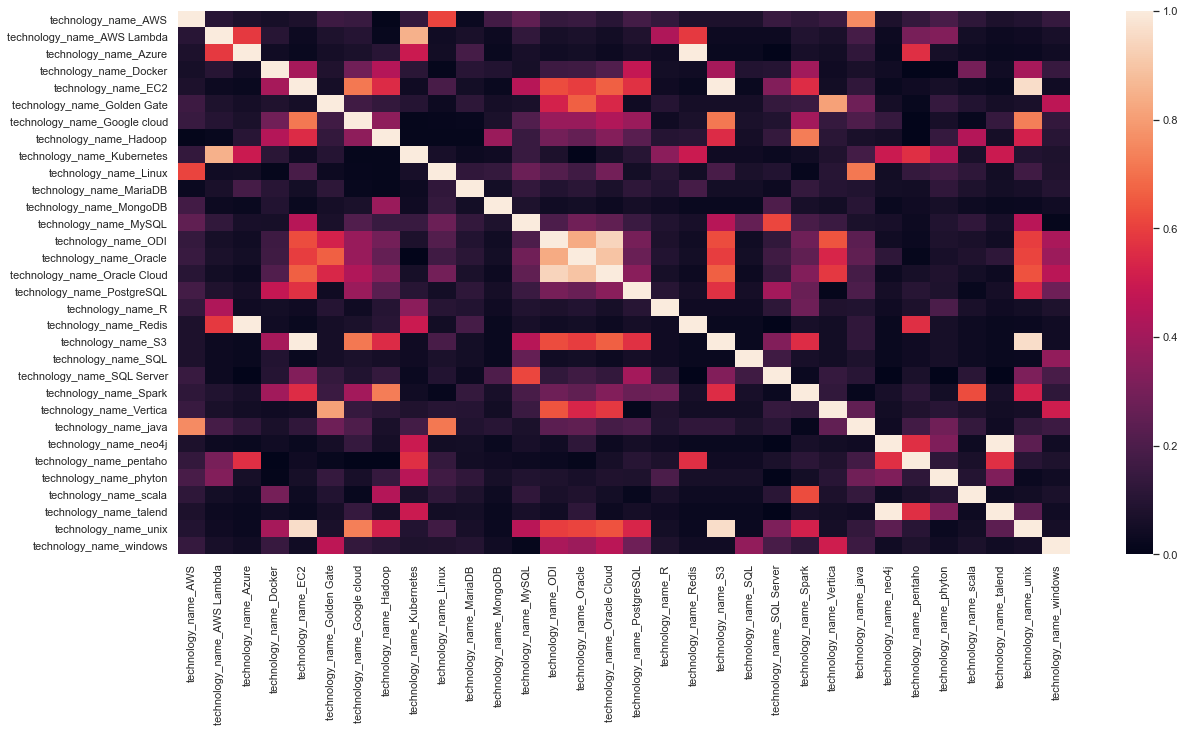

In [357]:
# Create correlation matrix
corr_matrix = skills2.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

Esta visión nos permite ver mejores agrupaciones, pero no radicalmente mejores. Permite mejorar el KMeans, pero aun los resulados no son los mejores.

In [358]:
skills2.sum()

technology_name_AWS             104.0
technology_name_AWS Lambda        7.0
technology_name_Azure             3.0
technology_name_Docker           86.0
technology_name_EC2              11.0
technology_name_Golden Gate      35.0
technology_name_Google cloud     43.0
technology_name_Hadoop           44.0
technology_name_Kubernetes       10.0
technology_name_Linux           199.0
technology_name_MariaDB          28.0
technology_name_MongoDB           8.0
technology_name_MySQL            70.0
technology_name_ODI              31.0
technology_name_Oracle           38.0
technology_name_Oracle Cloud     23.0
technology_name_PostgreSQL       44.0
technology_name_R                12.0
technology_name_Redis             3.0
technology_name_S3               11.0
technology_name_SQL               7.0
technology_name_SQL Server      128.0
technology_name_Spark            50.0
technology_name_Vertica          28.0
technology_name_java            186.0
technology_name_neo4j             3.0
technology_n

Aquí podemos ver las skills más importantes para los data scientist pesadas por experiencia.

In [359]:

exp = np.asarray(data_scientists['person_experience'])
len(exp)
skills_ds = data_scientists.iloc[:,43:].multiply(exp, axis='rows', level=None, fill_value=None)
skills_ds.sample(3)

,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,...,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,11.0,0.0,0.0,0.0,11.0,0.0,0.0,...,11.0,0.0,11.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0


In [360]:
clue = skills_ds.sum()
clue.sample(3)

technology_name_SQL             0.0
technology_name_Google cloud    8.0
technology_name_PostgreSQL      4.0
dtype: float64

A partir de acá conocemos las tecnologías conocidas por los data scientists pesadas por experiencia.

Probamos con ideas de https://github.com/eflegara/NetStruc

In [361]:
try:
    ## For Network Analysis and Visualization
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from collections import defaultdict
    import operator

    ## For Hierarchical Clustering
    from scipy.cluster import hierarchy
    from scipy.spatial import distance
    
    ## For Community Detection (Louvain Method)
    #import community
    import unicodecsv as csv
    
except:
    import traceback
    traceback.print_exc()
    raise ImportError('Something failed, see above.')

In [362]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [363]:
pd.set_option('display.max_columns', None)

for_g = dataset3.drop(columns=["Docker", "Hadoop", "java", "scala", "Spark", "AWS Lambda", "phyton", "Kubernetes", "Linux", "MySQL", "SQL Server", "R", "Google cloud", "PostgreSQL", "AWS","MongoDB","Vertica","ODI","Golden Gate","Oracle","pentaho","windows","SQL","MariaDB","Oracle Cloud","Redis","Azure","unix","S3", "EC2","talend",	"neo4j","skill_id", "skill_type", "person_name", "person_type", "person_category", "person_gender", "person_age", "person_experience", "technology_id", "technology_type"])
for_g.reset_index(drop=True, inplace=True)
for_g = for_g.set_index(["skill_name"]).stack().rename('Status').reset_index().query('Status != 0')
#for_g = for_g[for_g["skill_name"]=="Data Scientist"]
display(for_g.sample(5))

,skill_name,level_1,Status
564,DBA,technology_name_SQL,1
469,Developer,technology_name_SQL Server,1
841,Technical Leader,technology_name_Linux,1
835,Technical Leader,technology_name_Docker,1
53,Data Scientist,technology_name_SQL Server,1


<class 'networkx.classes.graph.Graph'>


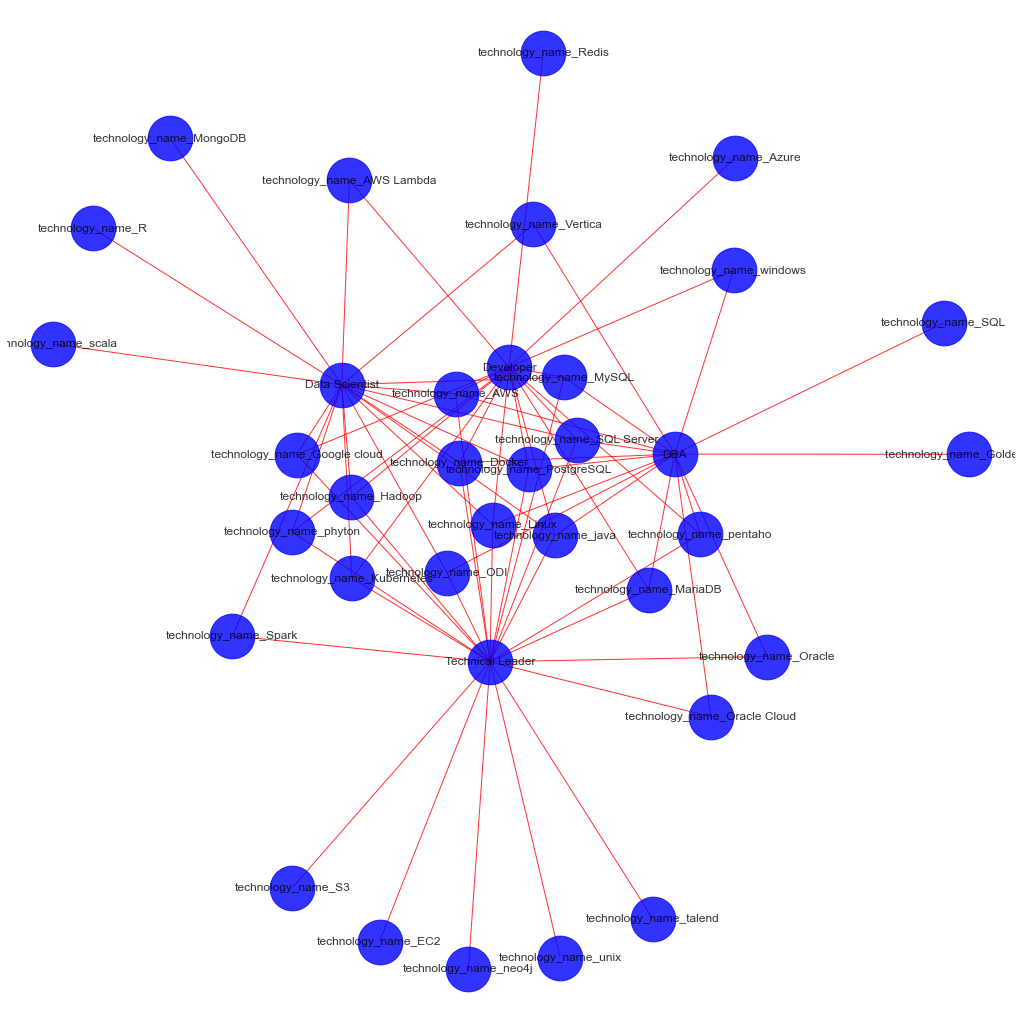

<Figure size 432x288 with 0 Axes>

In [364]:
#Librerias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.style as style 

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-colorblind")

#Gráfico
G = nx.from_pandas_edgelist(for_g,'level_1','skill_name')

print(type(G))
# larger figure size
plt.figure(3,figsize=(14,14)) 
#nx.draw(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_random(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
#nx.draw_circular(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8) 
#nx.draw_spectral(G, with_labels=True, node_color='r', node_size=1000, alpha=0.8)
nx.draw_spring(G, with_labels=True, node_color='b', node_size=2000, alpha=0.8, edge_color="r")
plt.show()
plt.savefig("skills_grafo.jpg")

## 5.1 Sistema de Recomendación

Partiendo de los skills obtenidos por los Data Scientists:

In [365]:
data_scientists.sample(3)

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_type,Docker,Hadoop,java,scala,Spark,AWS Lambda,phyton,Kubernetes,Linux,MySQL,SQL Server,R,Google cloud,PostgreSQL,AWS,MongoDB,Vertica,ODI,Golden Gate,Oracle,pentaho,windows,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,technology_name_MariaDB,technology_name_MongoDB,technology_name_MySQL,technology_name_ODI,technology_name_Oracle,technology_name_Oracle Cloud,technology_name_PostgreSQL,technology_name_R,technology_name_Redis,technology_name_S3,technology_name_SQL,technology_name_SQL Server,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Diego M,person,3,male,35.0,11.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Gustavo M,person,2,male,31.0,4.0,f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Natali L,person,2,female,24.0,4.0,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [366]:
clue.sample(3)

technology_name_java            39.0
technology_name_Oracle Cloud     0.0
technology_name_R               12.0
dtype: float64

In [367]:
skills_ds.sample(3)

,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,technology_name_MariaDB,technology_name_MongoDB,technology_name_MySQL,technology_name_ODI,technology_name_Oracle,technology_name_Oracle Cloud,technology_name_PostgreSQL,technology_name_R,technology_name_Redis,technology_name_S3,technology_name_SQL,technology_name_SQL Server,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
base = skills_ds.pivot_table(columns=skills_ds.index)
base.head()

person_id,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f636f067f89cc14862c,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f636f067f89cc14862c
technology_name_AWS,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
technology_name_AWS Lambda,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
technology_name_Azure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
technology_name_Docker,0.0,0.0,0.0,4.0,0.0,0.0,0.0,11.0,0.0
technology_name_EC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
base['count'] = base[base !=0 ].count(axis=1, level=None, numeric_only=True)

In [370]:
base['average'] = base.mean(axis=1)

In [371]:
C = base['average'].mean()

In [372]:
m = base['count'].quantile(0.70)

In [373]:
V = base['count']
R = base['average']
C 
m 

base['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

In [374]:
skills_ranked = base.sort_values('weighted_average', ascending=False)

## Recommender Mk1

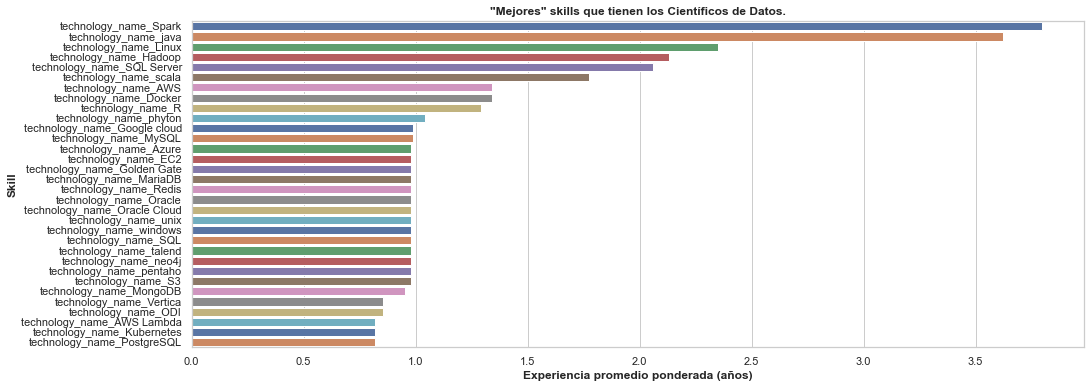

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

wavg = skills_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'], y=wavg.index, data=wavg, palette='deep')

plt.xlim()
plt.title('"Mejores" skills que tienen los Científicos de Datos.', weight='bold')
plt.xlabel('Experiencia promedio ponderada (años)', weight='bold')
plt.ylabel('Skill', weight='bold')

plt.savefig('skills.png')

Esto nos permite tener un recomendador "genérico", sin conocer las skills del RRHH.

## Recommender Mk2

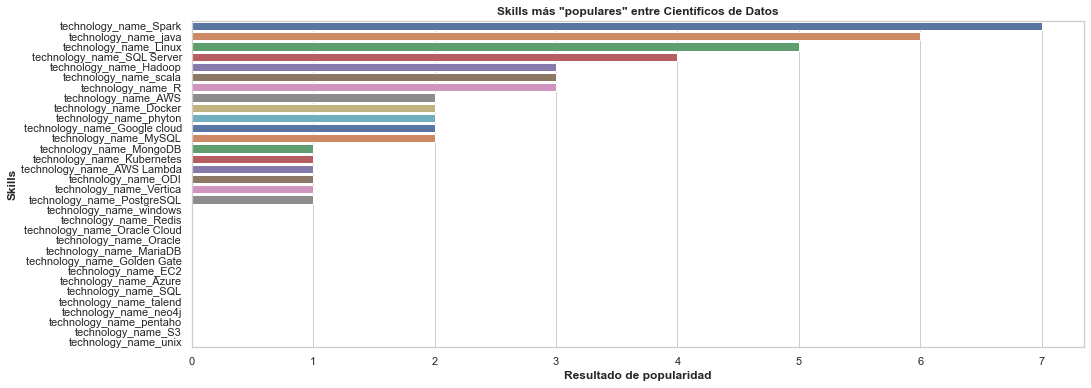

In [376]:
popular = skills_ranked.sort_values('count', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['count'], y=popular.index, data=popular, palette='deep')

plt.title('Skills más "populares" entre Científicos de Datos', weight='bold')
plt.xlabel('Resultado de popularidad', weight='bold')
plt.ylabel('Skills', weight='bold')

plt.savefig('popular_skills.png')

## **Calculating Similarity Scores**
Crearemos un recomendador basado en skills, en primer lugar, luego intentaremos restringirlo para convertir a los recursos en Data Scientists.

In [377]:
base2 = skills2.pivot_table(columns=skills2.index)
base2.head()

person_id,02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f636f067f89cc14862c,50bed0c3b83bad942595d9e0d1dd0fd1-c81e728d9d4c2f636f067f89cc14862c,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2f636f067f89cc14862c,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2f636f067f89cc14862c,6066705e4d75e392b21a845537dfbcc9-c81e728d9d4c2f636f067f89cc14862c,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e71d9181a67b7542122c,6f67cd4d1b4109e9d15073ee35bd49fb-c81e728d9d4c2f636f067f89cc14862c,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e71d9181a67b7542122c,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2f636f067f89cc14862c,87f1d3a3fcdd5e8b39fe59e0f2bf0e35-c81e728d9d4c2f636f067f89cc14862c,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e71d9181a67b7542122c,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2f636f067f89cc14862c,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2f636f067f89cc14862c,a5cc32b5351b68e8ab78e0549c245e54-c81e728d9d4c2f636f067f89cc14862c,ac37b1f5d42e5d18336340a3f089d8b2-c81e728d9d4c2f636f067f89cc14862c,b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2f636f067f89cc14862c,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c,c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2f636f067f89cc14862c,d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2f636f067f89cc14862c,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2f636f067f89cc14862c,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2f636f067f89cc14862c,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2f636f067f89cc14862c,f20e41c6c047d2efa88d37d01a3af246-c81e728d9d4c2f636f067f89cc14862c,f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c,f5b3b175e984e125c98e21c71dcddd71-c81e728d9d4c2f636f067f89cc14862c,f6b8790fd8dcb51f4ccec2e19f6db824-a87ff679a2f3e71d9181a67b7542122c,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2f636f067f89cc14862c,f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2f636f067f89cc14862c,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2f636f067f89cc14862c
technology_name_AWS,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,3.0,4.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,4.0,0.0,27.0,10.0,0.0
technology_name_AWS Lambda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
technology_name_Azure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
technology_name_Docker,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,5.0,4.0,11.0,0.0,0.0,0.0,10.0,0.0
technology_name_EC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0


In [378]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics import pairwise_distances


''' 
El ejemplo usa sigmoid kernel, se puede experimentar con otro tipo de distancias que sean más apropiadas. En particular lo sustituí por distancia euclidea.

'''
# Compute the distances
dis = pd.DataFrame(pairwise_distances(base2, base2), columns= base2.index, index=base2.index)
rev_distances = dis ** -1
rev_distances[rev_distances >1 ] =1
rev_distances.sample(3)

,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,technology_name_Kubernetes,technology_name_Linux,technology_name_MariaDB,technology_name_MongoDB,technology_name_MySQL,technology_name_ODI,technology_name_Oracle,technology_name_Oracle Cloud,technology_name_PostgreSQL,technology_name_R,technology_name_Redis,technology_name_S3,technology_name_SQL,technology_name_SQL Server,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
technology_name_S3,0.026603,0.082761,0.087706,0.043153,1.000000,0.052559,0.090536,0.062137,0.080322,0.022611,0.057073,0.073521,0.047836,0.074953,0.069505,0.083333,0.064685,0.076923,0.087706,1.000000,0.076696,0.033884,0.062137,0.054800,0.021806,0.087706,0.082199,0.071982,0.059444,0.087706,0.333333,0.047458
technology_name_R,0.027318,0.156174,0.132453,0.038519,0.076923,0.058824,0.062137,0.048337,0.141421,0.022027,0.065372,0.094491,0.042954,0.053683,0.051571,0.056523,0.049507,1.000000,0.132453,0.076923,0.101535,0.031497,0.054882,0.062017,0.022553,0.132453,0.115470,0.106600,0.069007,0.132453,0.074953,0.051917
technology_name_Oracle,0.024984,0.053225,0.054473,0.037582,0.069505,0.076029,0.056705,0.046324,0.053916,0.023206,0.044108,0.050508,0.042486,0.101535,1.000000,0.125988,0.047351,0.051571,0.054473,0.069505,0.051503,0.032410,0.046324,0.065372,0.020970,0.055989,0.054473,0.051164,0.045175,0.055989,0.071067,0.052486


In [379]:
def give_rec(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [380]:
# Testing our content-based recommendation system
give_rec('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_S3',
 'technology_name_EC2',
 'technology_name_unix']

In [381]:
#Traemos las skills que solo poseen los data scientits, y las usaremos para filtrar las recomendaciones
ds_skills = clue[clue != 0]
ds_skills

technology_name_AWS             15.0
technology_name_AWS Lambda       4.0
technology_name_Docker          15.0
technology_name_Google cloud     8.0
technology_name_Hadoop          26.0
technology_name_Kubernetes       4.0
technology_name_Linux           24.0
technology_name_MongoDB          8.0
technology_name_MySQL            8.0
technology_name_ODI              5.0
technology_name_PostgreSQL       4.0
technology_name_R               12.0
technology_name_SQL Server      22.0
technology_name_Spark           39.0
technology_name_Vertica          5.0
technology_name_java            39.0
technology_name_phyton           9.0
technology_name_scala           20.0
dtype: float64

In [382]:
def give_rec_ds(skill, rev_distances=rev_distances):
    
    # Get the pairwsie similarity scores 
    dis_scores = pd.DataFrame(rev_distances[skill])

    # Sort the skills 
    dis_scores.sort_values(by=skill, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last') #ignore_index=False )
    
    #Skills that only DS have
    dis_scores = dis_scores[dis_scores.index.isin(ds_skills.index)]

    # Scores of the 5 most similar skills
    dis_scores = dis_scores[1:6]

    # Top 5 most similar skills
    return list(dis_scores.index)

In [383]:
give_rec_ds('technology_name_Spark')

['technology_name_Hadoop',
 'technology_name_scala',
 'technology_name_Google cloud',
 'technology_name_R',
 'technology_name_AWS Lambda']

### Con esto tenemos un recomendador de Skills (para cursos por ejemplo), para responder a la pregunta: ¿Qué le recomendamos a X cómo próxima skill que debería dominar?

### A continuación respondemos a la pregunta: ¿Cómo valoraría X adquirir una skill?

Para ello buscaremos la correlación entre los individuos. Luego seleccionaremos los n individuos más cercanos a la persona X, e inferiremos la valoracion (a través de la experiencia), de multiplicar la correlación de cada individo con X por la experiencia de cada individuo.

In [384]:
def neighbors(id = None, n=5):
    
#Armamos la matriz de correlaciones de Pearson
    corr_ind = base2.corr()

#Seleccionamos al individuo y traemos su fila y la ordenamos por semejanza
    all_neighbors = corr_ind.loc[id].sort_values(ascending=False)
    
#Devolvemos los n más cercanos sin incluirlo
    
    return all_neighbors.iloc[1:n+1]

In [385]:
def likeness_pred(id = None, n=10, tech=None):

    #usamos la función de vecinos para traer los N más cercanos
    nei = neighbors(id, n)
    
    #tomamos la valoración de los individuos para la tecnología
    technology = base2.loc[tech]
    
    #devolvemos la media de la multiplicación de las valoraciones por la correlación
    return technology.multiply(n).dropna().mean()

In [386]:
likeness_pred(id='10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c', n=10, tech='technology_name_Hadoop')

10.232558139534884

Con esto podemos predecir cuanto apreciará ganar experiencia en una determinada tecnología un individo X.